In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
from ATS.stats import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots online
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-16 17:41:51.102270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 17:41:51.102315: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load data and subset

<Item title:"SAC_Monthly_Plant_Health" type:Feature Layer Collection owner:Anooshi>
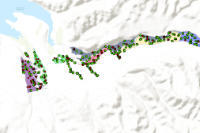

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('d0056498ecf246108f2d3a2b0c8860ae')

data = output['data0']
feature_service = output['feature_service']

In [3]:
data.head()

,OBJECTID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,AliveDead,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,Depredated,DeadPathog,Comments,Species,GlobalID,Volunteers,Missing,SHAPE
0,1,SAC,2018-04-03 00:25:59,Marina Olson,Roger Stephens,Alive,4 - Poor health; appears heavily afflicted or ...,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,Light,None,None,None,None,RUUR,4da83822-6a93-4aa9-8ff1-273d1ad65acf,Yes,None,"{""x"": 6184128.309989557, ""y"": 2036143.85749115..."
1,2,SAC,2018-04-03 00:35:52,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction o...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,None,None,"Light stem damage, looks like a result of deer...",SYAL,6c32d178-7968-423a-81d2-f40088e2cb46,None,None,"{""x"": 6184062.451525465, ""y"": 2036293.59538064..."
2,3,SAC,2018-04-03 00:46:02,Marina Olson,Roger Stephens,Alive,3 - Moderate health; moderate signs of afflict...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,None,None,None,None,"Somewhat small, not too many leaves present. B...",SYAL,00e9f932-4a5b-46fc-bfb5-87951ebfa99f,None,None,"{""x"": 6183921.109944642, ""y"": 2036395.45377272..."
3,4,SAC,2018-04-03 00:55:29,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction o...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Light insect browse on lower portions of leaves.,ARDO,f78ac082-553e-410f-9cd1-1b6df14d4821,None,None,"{""x"": 6183597.127324894, ""y"": 2036518.53325097..."
4,5,SAC,2018-04-03 01:00:50,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction o...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Some insect browse on lower leaves.,ARDO,2cbe574b-fabb-4e4d-b742-286df6eae8bd,None,None,"{""x"": 6183603.6991621405, ""y"": 2036550.8245249..."


In [4]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 938


# QAQC

In [4]:
#Seperates out the data by months for use in later plots

data['month'] = pd.DatetimeIndex(data['Observation_Date']).month
data['Year'] = pd.DatetimeIndex(data['Observation_Date']).year

In [5]:
# Validate domains
validate_domains(feature_service)



Table/Layer:  Assessment


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Joy Stewart, Richard Graham-Bruno, Janel Mayo, Ryan Swanson, Jackson Sabol}"
0,Surveyor_2,"{Joy Stewart, Janel Mayo, Jackson Sabol, Ryan Swanson}"
0,HealthRank,{}
0,ExcptRob,{}
0,PlantStunt,{}
0,EnteringDo,{}
0,Dormant,{}
0,MainStmDeR,{}
0,StemDiebac,{}
0,ShootBranc,{}




Table/Layer:  Planted Zones


No Mismatches Found


In [6]:
# QAQC Find blank entries
find_blank_entries(sub, exclude_cols=['Surveyor_2','ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
                                       'HealthRank','Volunteers','Missing'])

No blank Observation_Date
No blank Surveyor_1
No blank SHAPE
No blank BHR_Site
No blank Species
No blank AliveDead
No blank OBJECTID
No blank GlobalID


NameError: name 'splot' is not defined

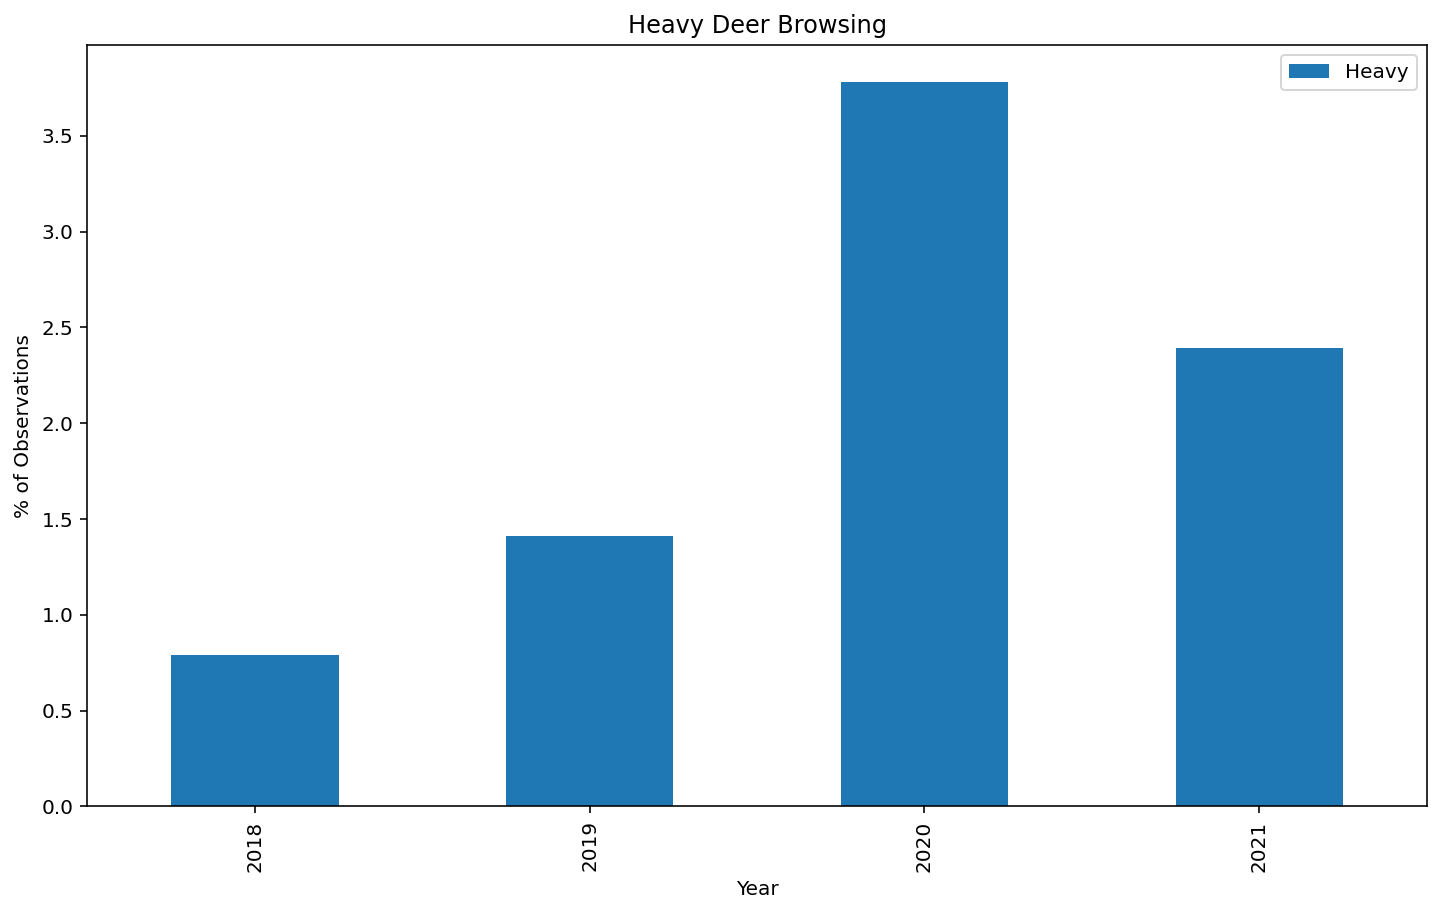

In [8]:
# Count of observations per year
obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by grazing impact levels
impact_pct = data.groupby(['Year','DeerBrow']).size() / obs_count_by_year *100

#Turn into dataframe
impact_pct_df = impact_pct.unstack()

#Reorder columns
impact_pct_df = impact_pct_df[['Heavy']]
#Bar plot
axes = impact_pct_df.plot.bar()
plt.ylabel('% of Observations')
plt.xlabel('Year')
plt.title('Heavy Deer Browsing')
axes.legend(title='')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

NameError: name 'splot' is not defined

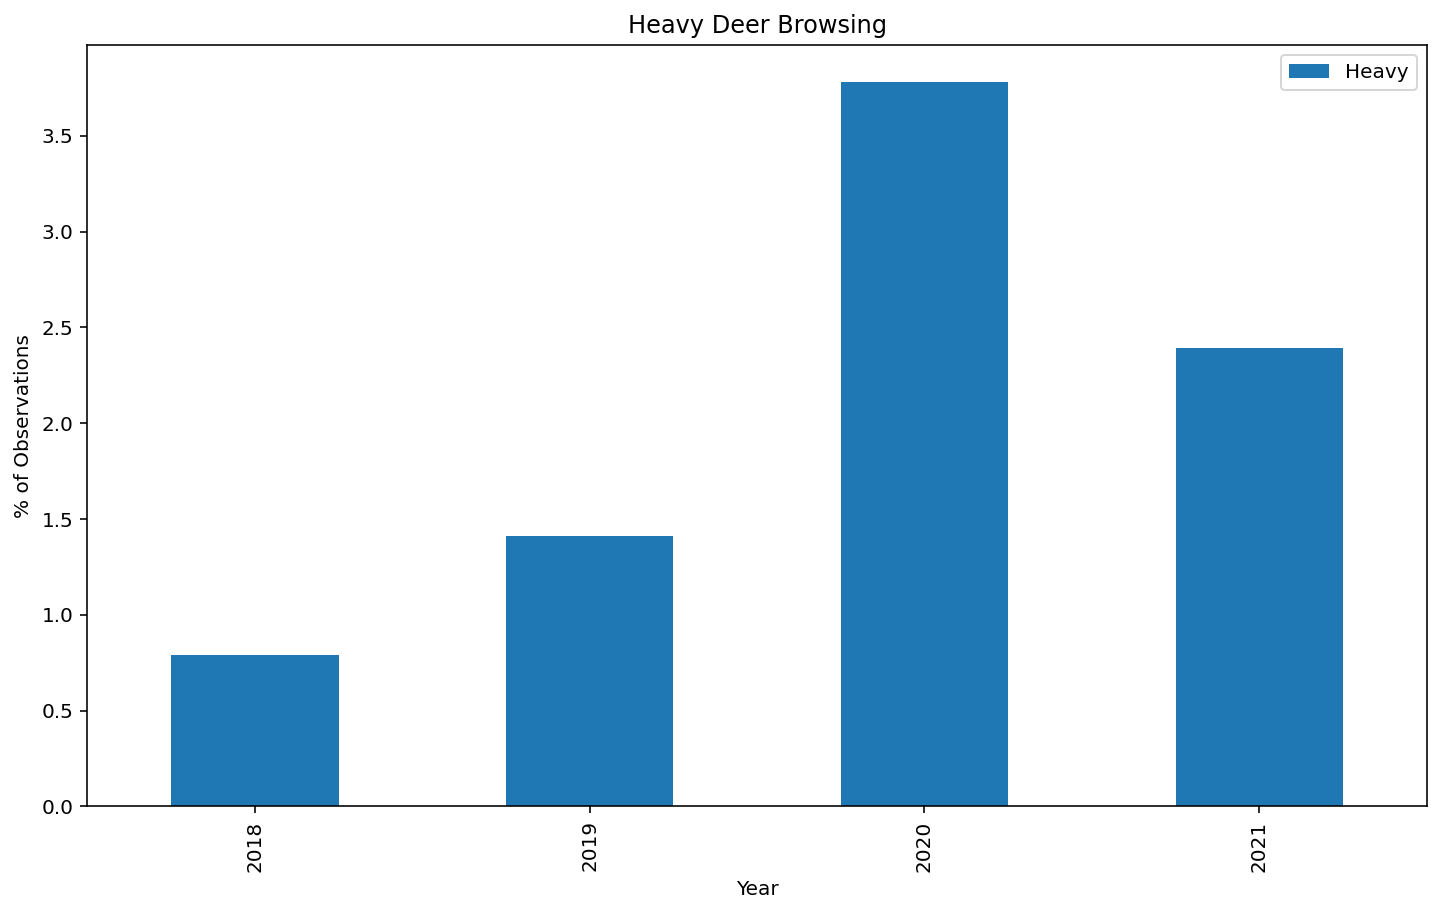

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count of observations per year
obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by grazing impact levels
impact_pct = data.groupby(['Year','DeerBrow']).size() / obs_count_by_year *100

#Turn into dataframe
impact_pct_df = impact_pct.unstack()

#Reorder columns
impact_pct_df = impact_pct_df[['Heavy']]
#Bar plot
axes = impact_pct_df.plot.bar()
plt.ylabel('% of Observations')
plt.xlabel('Year')
plt.title('Heavy Deer Browsing')
axes.legend(title='')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

splot=sns.barplot(x="Year",y="DeerBrow",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Continent", size=14)
plt.ylabel("LifeExp", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


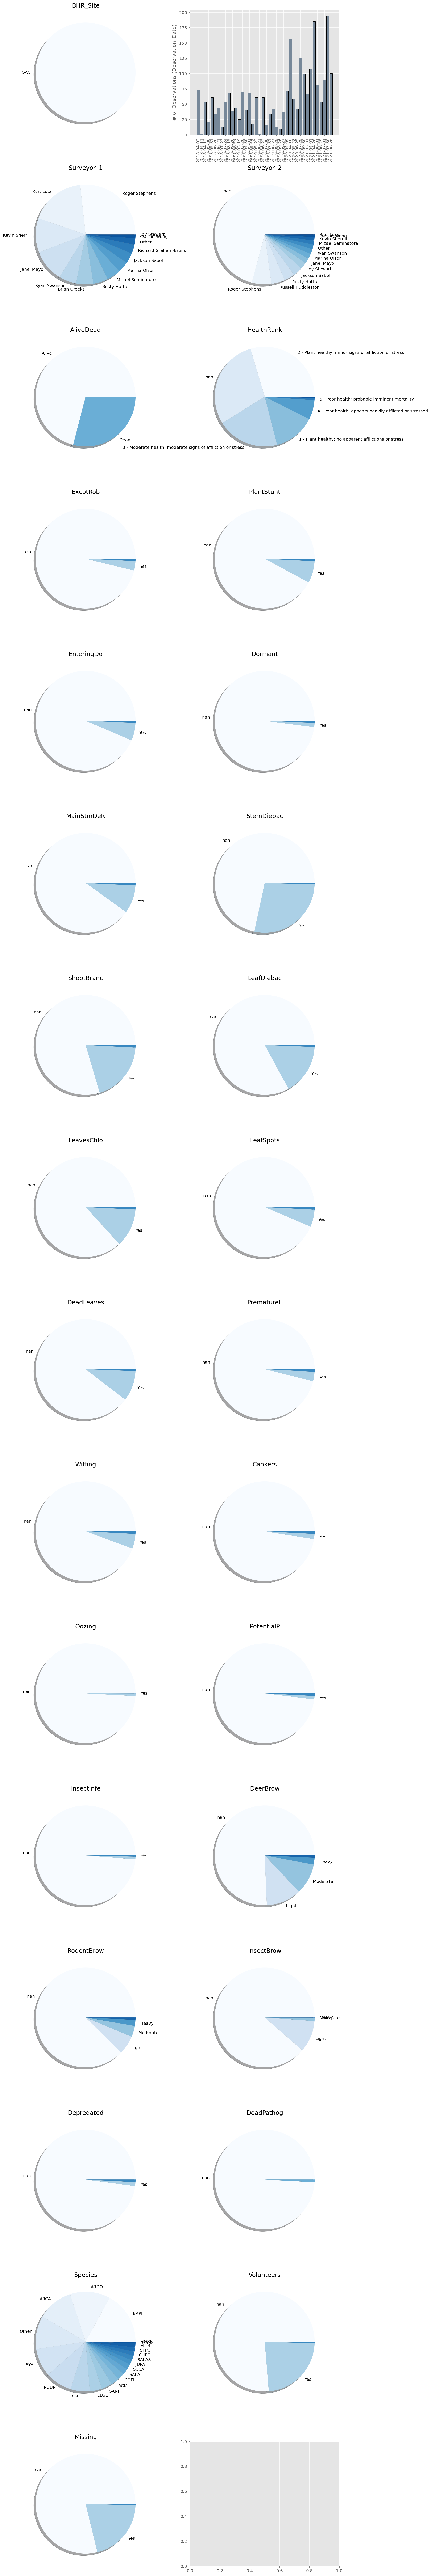

In [10]:
QAQC_plot(data, ['BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 
       'Species',  'Volunteers', 'Missing' ])

Dropping surveyors with less than 28.950000000000003 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Brian Creeks']


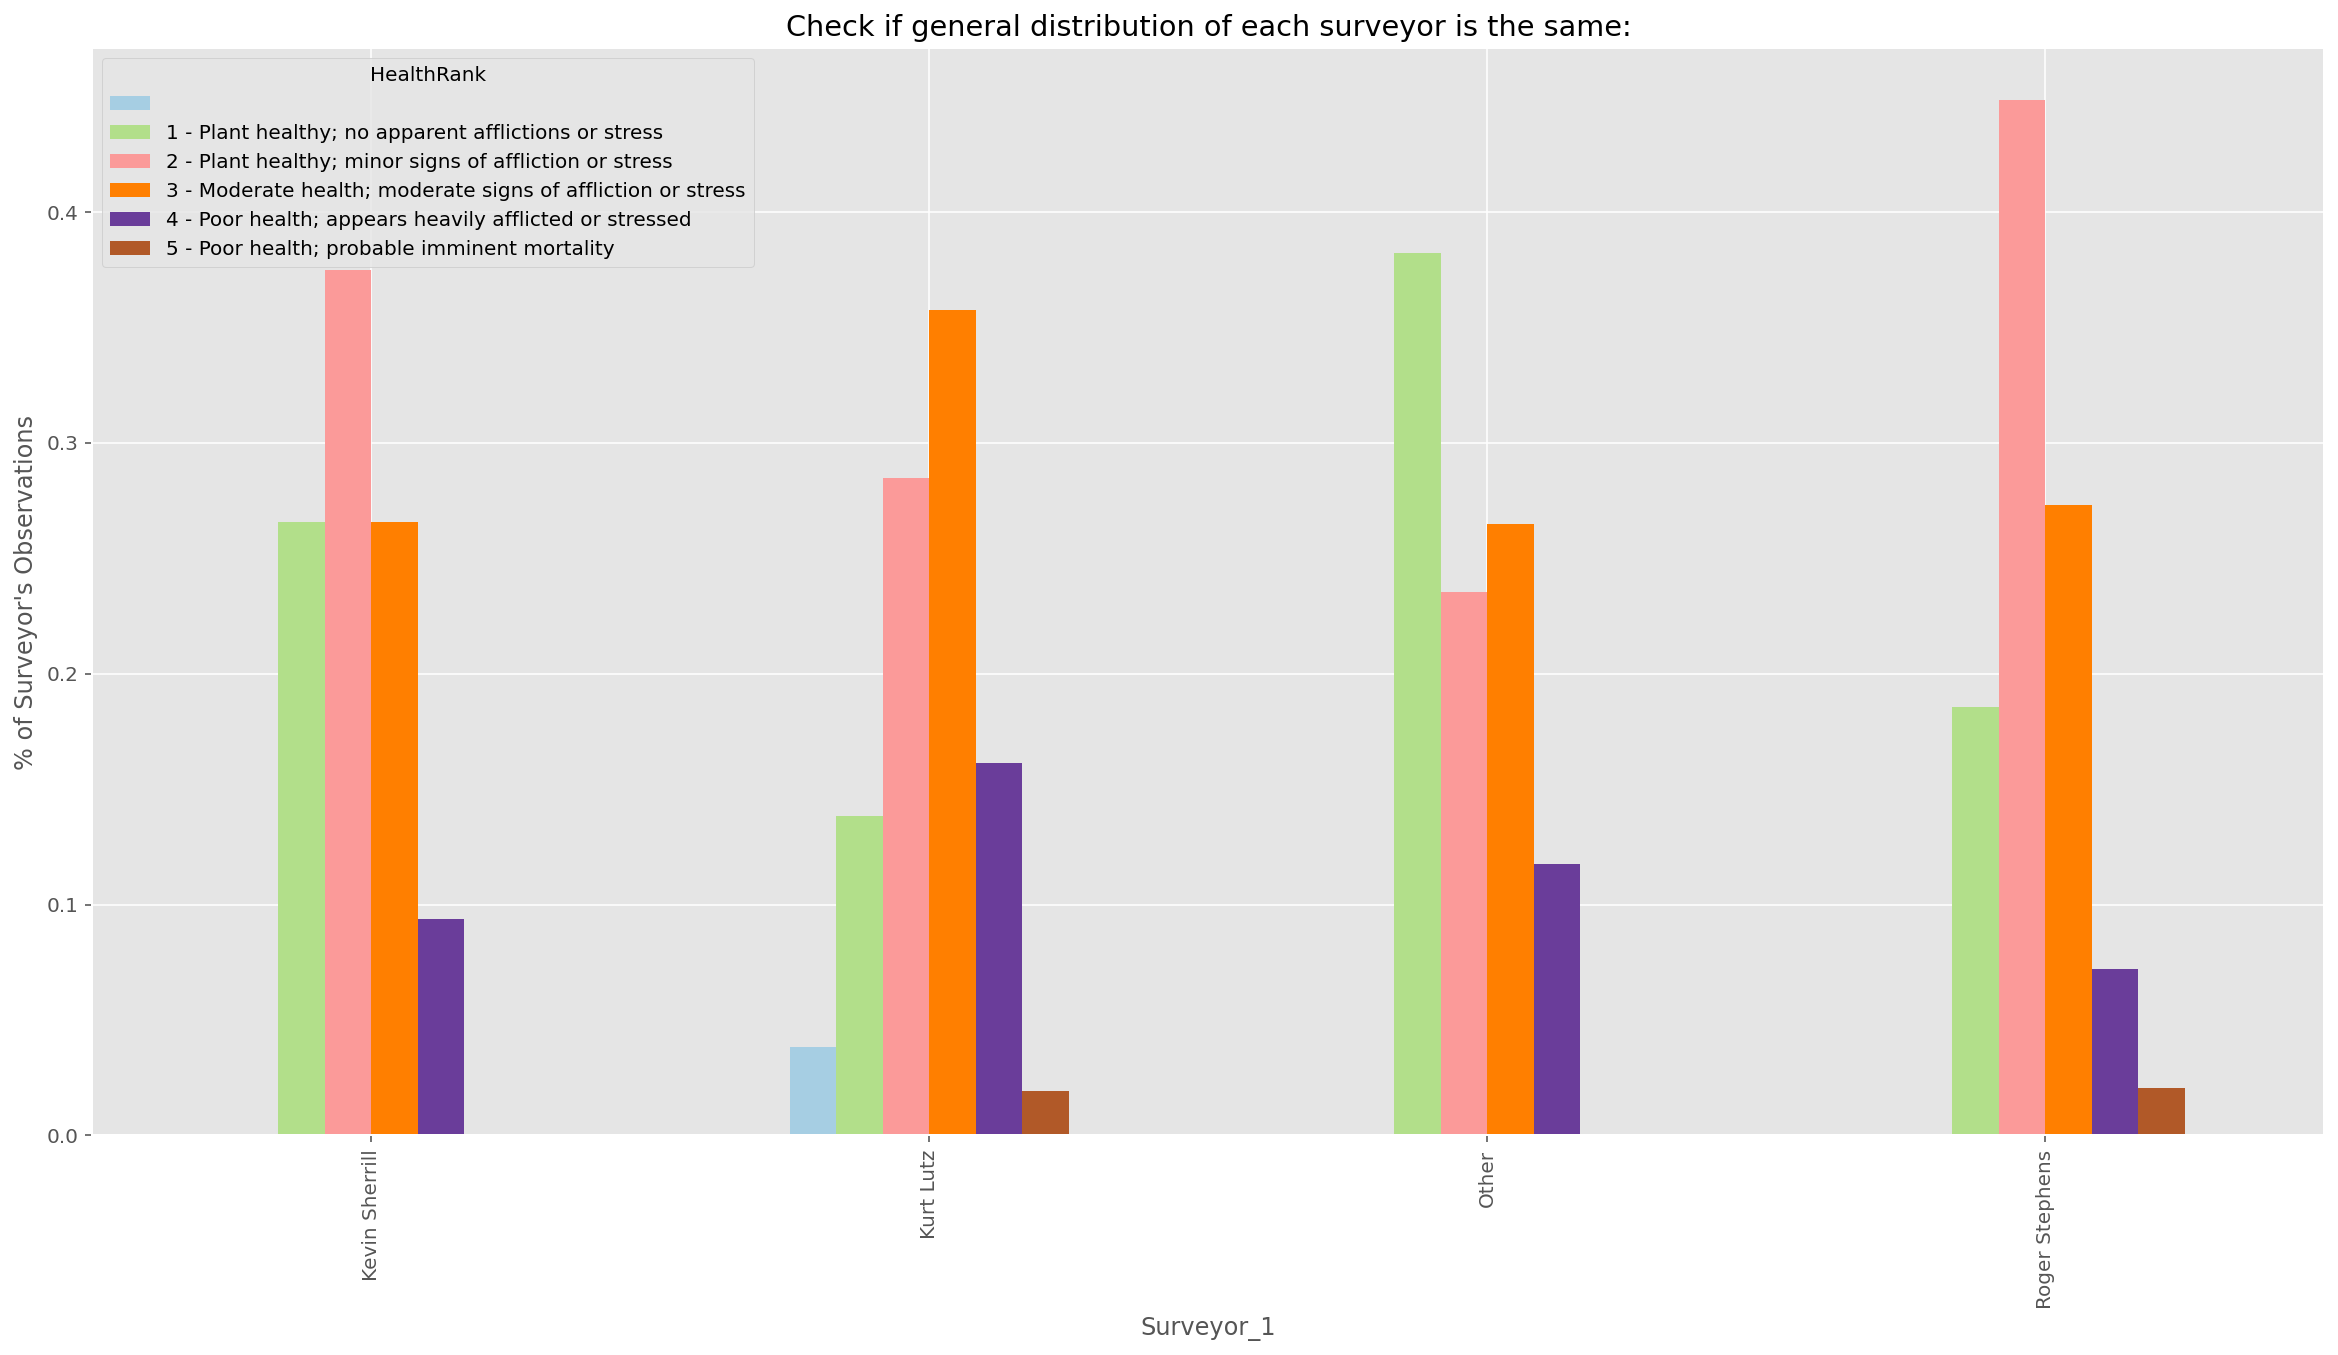

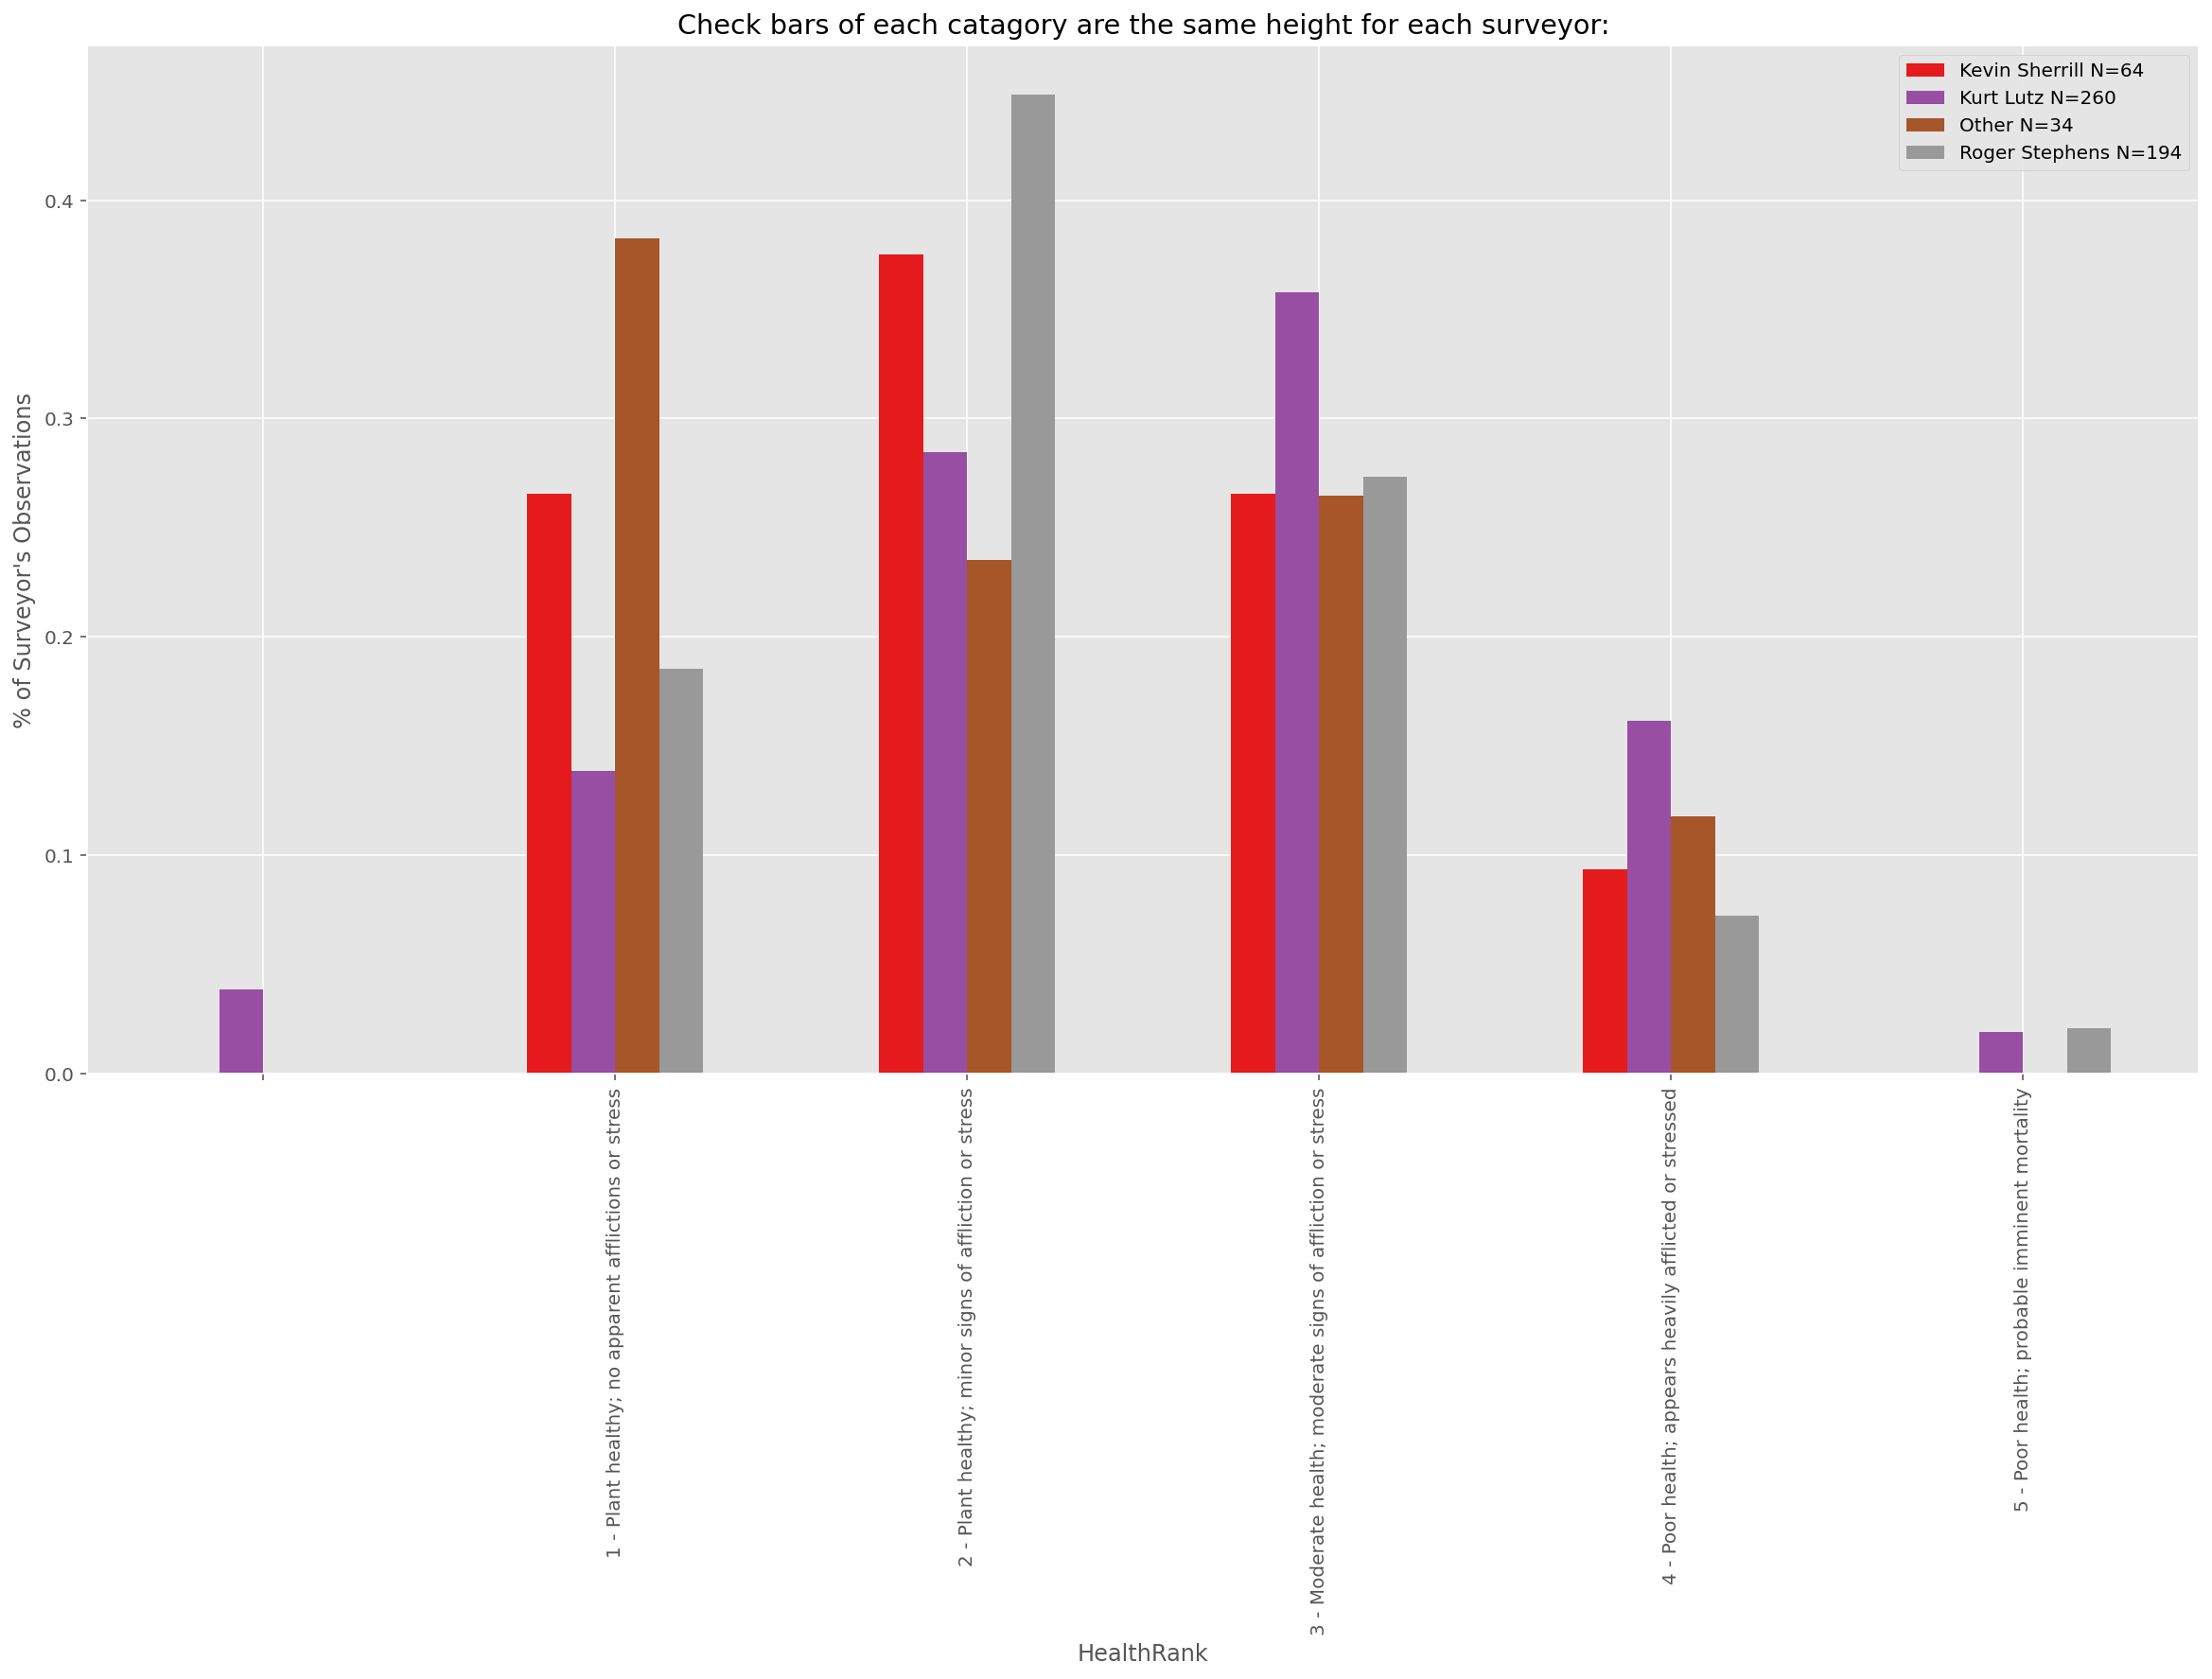

In [11]:
compare_surveyors(sub, 'HealthRank', 'Surveyor_1', 5)

ERROR: DeadPathog does not contain values.
ERROR: Oozing does not contain values.


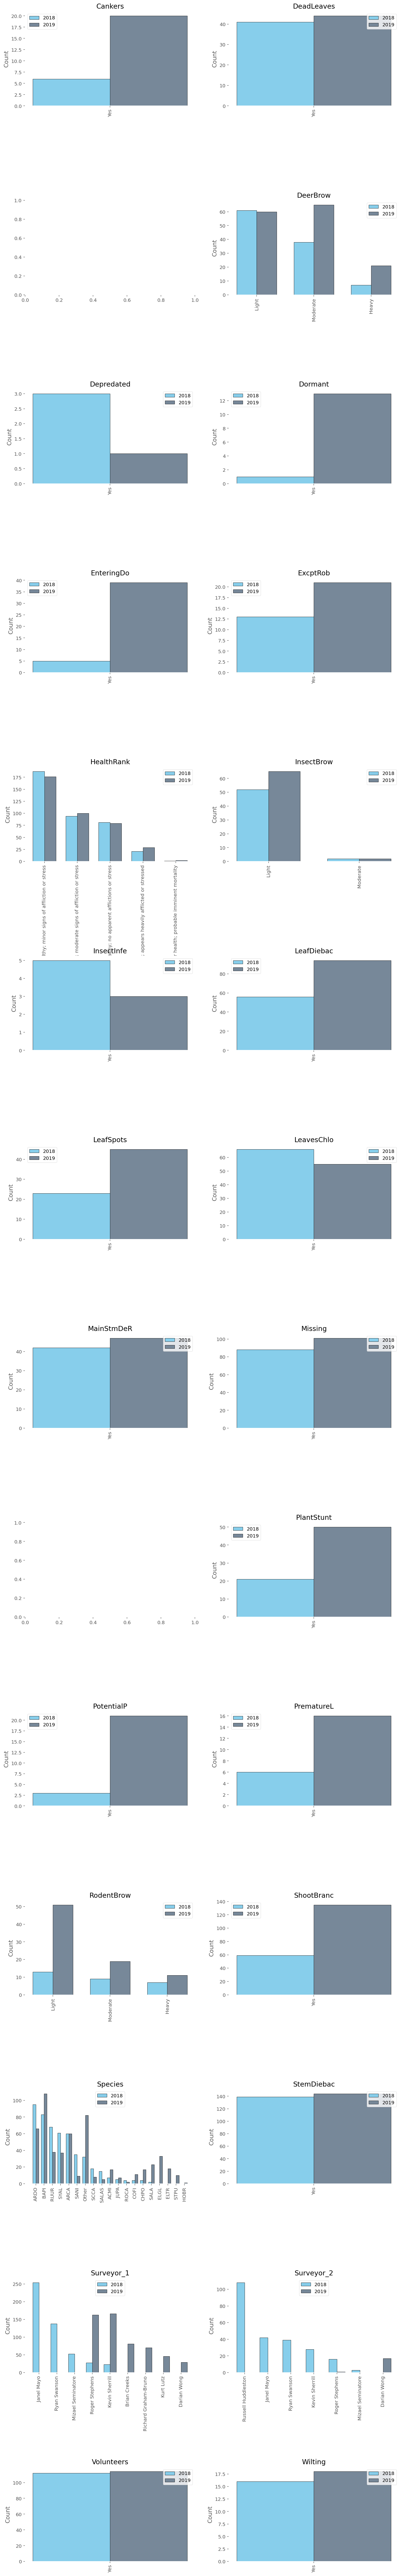

In [12]:
# compare categorical data between years
compare_years_catagorical(data, ['Cankers', 'DeadLeaves',
       'DeadPathog', 'DeerBrow', 'Depredated', 'Dormant', 'EnteringDo',
       'ExcptRob', 'HealthRank', 'InsectBrow',
       'InsectInfe', 'LeafDiebac', 'LeafSpots', 'LeavesChlo', 'MainStmDeR',
       'Missing', 'Oozing', 'PlantStunt', 'PotentialP',
       'PrematureL', 'RodentBrow', 'ShootBranc', 'Species',
       'StemDiebac', 'Surveyor_1', 'Surveyor_2', 'Volunteers',
       'Wilting'], '2018', '2019') 

In [7]:
#Find if alive entries have health rank
result = sub.loc[(sub['AliveDead'] == 'Alive') & pd.isna(sub['HealthRank'])]
if not result.empty:
    print('Missing "HealthRank" (Plant Health Condition) entries:')
    display(result)
else:
    print('All "HealthRank" (Plant Health Condition) entries are completed for alive trees')

Missing "HealthRank" (Plant Health Condition) entries:


,OBJECTID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,AliveDead,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,Depredated,DeadPathog,Comments,Species,GlobalID,Volunteers,Missing,SHAPE
1615,1619,SAC,2021-03-31 20:42:42,Other,Roger Stephens,Alive,None,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Last years main stems present as skeletons.,ARDO,e1bdae76-e334-44ff-b57e-24defa42c8ed,Yes,None,"{""x"": 6183460.161715702, ""y"": 2036931.6570880876, ""spatialReferenc..."
1620,1624,SAC,2021-03-31 21:13:01,Other,Roger Stephens,Alive,None,None,Yes,None,None,Yes,Yes,Yes,None,None,None,None,None,None,None,None,None,None,Moderate,None,None,None,None,Clustering at the leaf axils.,SYAL,346aea19-1823-44f7-8c65-61624a0244c6,None,None,"{""x"": 6184085.726016856, ""y"": 2036245.798103746, ""spatialReference..."
1675,1679,SAC,2021-04-01 18:29:28,Other,Roger Stephens,Alive,None,None,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Stem dieback is last years stem,ACMI,c4972e06-0451-4779-b52c-138170324af9,Yes,None,"{""x"": 6186620.604869301, ""y"": 2037801.2689582459, ""spatialReferenc..."
1706,1710,SAC,2021-04-01 18:42:21,Kurt Lutz,None,Alive,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,BAPI,ab112251-3c4c-407e-9dd8-7113a658ab00,None,None,"{""x"": 6186437.112814274, ""y"": 2037721.176361497, ""spatialReference..."
1837,1841,SAC,2021-04-26 18:26:04,Kurt Lutz,None,Alive,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,Leaves only present at very top of canopy.,SALA,64a4520a-d929-4d5f-b4e7-07d6690c5cb3,None,None,"{""x"": 6184458.094677186, ""y"": 2036923.3750490074, ""spatialReferenc..."
1860,1864,SAC,2021-04-26 19:14:34,Kurt Lutz,None,Alive,None,None,None,None,None,None,Yes,Yes,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,BAPI,09c50f46-adcb-478b-a3d2-0868a3c6f7ec,None,None,"{""x"": 6185417.530758108, ""y"": 2037565.6760466178, ""spatialReferenc..."
2299,2303,SAC,2021-07-30 20:23:06,Kurt Lutz,None,Alive,None,None,None,None,None,None,Yes,Yes,None,None,None,None,None,None,Yes,None,None,None,None,Moderate,None,None,None,None,BAPI,44e97830-c83d-4105-adac-831b2b27e1a5,None,None,"{""x"": 6184557.789346449, ""y"": 2037333.086022168, ""spatialReference..."
2440,2446,SAC,2021-09-24 18:20:12,Other,Brian Creeks,Alive,None,None,None,None,None,None,Yes,None,Yes,None,None,None,None,None,None,None,None,None,Light,None,None,None,None,None,ARDO,903b8ab8-bcff-4068-a38e-4dabd52f94c7,None,None,"{""x"": 6190901.123194819, ""y"": 2037323.6632135634, ""spatialReferenc..."
2461,2467,SAC,2021-09-24 18:17:17,Brian Creeks,None,Alive,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Dormant, health score is not assessable.",STPU,31fe7eb9-db4b-4b10-8315-e7b54dd70595,None,None,"{""x"": 6190885.091950066, ""y"": 2037348.6005249615, ""spatialReferenc..."
2462,2468,SAC,2021-09-24 18:19:11,Brian Creeks,None,Alive,None,None,None,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Dormant, health score is not assessable.",ACMI,d8e96c93-62f6-4731-8935-8e2b5e9f5838,None,None,"{""x"": 6190882.125381535, ""y"": 2037366.352190215, ""spatialReference..."


In [14]:
#Find if dead entries have health rank
result = data.loc[(data.AliveDead == 'Dead') & data.HealthRank.notna()]
if not result.empty:
    print('"HealthRank" (Plant Health Condition) present when plant is dead entries: should be blank')
    display(result)
else:
    print('All "HealthRank" (Plant Health Condition) entries are completed for alive trees')

"HealthRank" (Plant Health Condition) present when plant is dead entries: should be blank


,OBJECTID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,AliveDead,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,Depredated,DeadPathog,Comments,Species,GlobalID,Volunteers,Missing,SHAPE,month,Year
1656,1660,SAC,2021-04-01 20:35:29.000000000,Roger Stephens,None,Dead,5 - Poor health; probable imminent mortality,None,None,None,None,Yes,Yes,Yes,Yes,None,None,None,None,None,None,None,None,None,None,Light,None,None,None,Most of shrub already dead.,BAPI,77e28624-670a-4d9b-a2e2-18c9fe12389f,None,None,"{""x"": 6184229.229060116, ""y"": 2037373.8444238654, ""spatialReferenc...",4,2021
2334,2338,SAC,2021-08-26 16:38:24.500999936,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,,4872ff47-c671-4269-978e-4bb36598da71,,Yes,"{""x"": 6185839.372094016, ""y"": 2037202.683412512, ""spatialReference...",8,2021
2339,2344,SAC,2021-08-26 17:23:54.453000192,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,,eb23c410-b12d-436a-b18b-2a0c24150508,,Yes,"{""x"": 6185492.67915212, ""y"": 2037497.7830044373, ""spatialReference...",8,2021
2340,2345,SAC,2021-08-26 17:30:42.340000000,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,,f5a701ba-2b82-49ee-adfe-13193404e34e,,Yes,"{""x"": 6185324.131043129, ""y"": 2037502.1824557767, ""spatialReferenc...",8,2021
2342,2348,SAC,2021-08-26 17:40:22.601000192,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,RUUR,531143be-343c-4d40-aea3-aff52b9b5c0a,,Yes,"{""x"": 6185126.013427588, ""y"": 2037427.0391669434, ""spatialReferenc...",8,2021
2344,2350,SAC,2021-08-26 17:49:32.130000128,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,Moderate,,Yes,,,BAPI,f1a83cdc-58c8-41f0-9485-15b9e1689188,,,"{""x"": 6184898.981326453, ""y"": 2037140.9188997212, ""spatialReferenc...",8,2021
2345,2351,SAC,2021-08-26 17:51:59.444999936,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,Light,,,,,SYAL,b019c0b5-1a68-4b91-aa43-3d3c00ed1314,,,"{""x"": 6184895.536114962, ""y"": 2037132.3571087532, ""spatialReferenc...",8,2021
2348,2354,SAC,2021-08-26 18:11:10.790999808,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,,26fe8f80-0eed-4b54-b131-9eb4c25b2ae4,,Yes,"{""x"": 6184448.092962708, ""y"": 2036712.7535222273, ""spatialReferenc...",8,2021
2350,2356,SAC,2021-08-26 18:18:26.100000000,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,,467a515e-39e4-496e-b34f-6e7e3da36f70,,Yes,"{""x"": 6184607.87422544, ""y"": 2036568.367804832, ""spatialReference""...",8,2021
2351,2357,SAC,2021-08-26 18:20:37.503000064,Kurt Lutz,Other,Dead,,,,,,,,,,,,,,,,,,,,,,,,,SCCA,4eb393cb-25fe-4778-af4f-6072b3256cf6,,Yes,"{""x"": 6184605.021247469, ""y"": 2036558.2613813083, ""spatialReferenc...",8,2021


In [15]:
QAQC_attachment_filenames(feature_service)

Found mislabeled photo attachement(s):
Assessment
Object ID: 158  Current Name:  Photo1.jpg


Object ID: 542  Current Name:  Photo1.jpg


Object ID: 938  Current Name:  Photo1.jpg


Object ID: 1933  Current Name:  Photo 6.jpg
Object ID: 1933  Current Name:  Photo 4.jpg
Object ID: 1933  Current Name:  Photo 1.jpg
Object ID: 1933  Current Name:  Photo 2.jpg
Object ID: 1933  Current Name:  Photo 5.jpg
Object ID: 1933  Current Name:  Photo 3.jpg


Object ID: 1936  Current Name:  Photo 1.jpg


Object ID: 1956  Current Name:  Photo 1.jpg


Object ID: 1978  Current Name:  Photo 1.jpg


Object ID: 2073  Current Name:  Photo 1.jpg



No attachments for layer/table Planted Zones


In [16]:
data.columns

Index(['OBJECTID', 'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
       'Species', 'GlobalID', 'Volunteers', 'Missing', 'SHAPE', 'month',
       'Year'],
      dtype='object')

In [17]:
field_order = 'OBJECTID', 'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
       'Species', 'GlobalID', 'Volunteers', 'Missing', 'SHAPE', 'month',
       'Year'

Index(['OBJECTID', 'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
       'Species', 'GlobalID', 'Volunteers', 'Missing', 'SHAPE', 'month',
       'Year'],
      dtype='object')

# Analysis

## Summary Statistics

In [14]:
sub['AliveDead'].count()


877

In [15]:
data.columns

Index(['OBJECTID', 'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
       'Species', 'GlobalID', 'Volunteers', 'Missing', 'SHAPE', 'month',
       'Year'],
      dtype='object')

In [16]:
#Create year column
data['Year'] = data.Observation_Date.dt.year

In [18]:
obs_count = data.groupby('Year').size()


In [19]:
alive = data.loc[data.AliveDead == 'Alive',:]
alive_obs_count = alive.groupby('Year').size()

In [20]:
print('# Alive and Dead')
data.groupby('Year').AliveDead.value_counts()

# Alive and Dead


Year  AliveDead
2018  Alive        371
      Dead         134
2019  Alive        385
      Dead         111
2020  Alive        396
      Dead         159
2021  Alive        575
      Dead         302
Name: AliveDead, dtype: int64

In [21]:
print('% Alive and Dead')
data.groupby('Year').AliveDead.value_counts() / obs_count *100

% Alive and Dead


Year  AliveDead
2018  Alive        73.465347
      Dead         26.534653
2019  Alive        77.620968
      Dead         22.379032
2020  Alive        71.351351
      Dead         28.648649
2021  Alive        65.564424
      Dead         34.435576
dtype: float64

In [22]:
data.groupby('Year').HealthRank.value_counts().sort_index() / alive_obs_count *100

Year  HealthRank                                                 
2018  1 - Plant healthy; no apparent afflictions or stress           18.059299
      2 - Plant healthy; minor signs of affliction or stress         41.509434
      3 - Moderate health; moderate signs of affliction or stress    31.536388
      4 - Poor health; appears heavily afflicted or stressed          7.277628
      5 - Poor health; probable imminent mortality                    1.617251
2019  1 - Plant healthy; no apparent afflictions or stress           21.038961
      2 - Plant healthy; minor signs of affliction or stress         48.571429
      3 - Moderate health; moderate signs of affliction or stress    24.415584
      4 - Poor health; appears heavily afflicted or stressed          5.454545
      5 - Poor health; probable imminent mortality                    0.259740
2020  1 - Plant healthy; no apparent afflictions or stress           19.949495
      2 - Plant healthy; minor signs of affliction or stress     

In [23]:
data.groupby('Year').Volunteers.value_counts().sort_index()

Year  Volunteers
2018  Yes           129
2019  Yes           112
2020  Yes           114
2021                 13
      Yes           208
Name: Volunteers, dtype: int64

In [24]:
data.groupby('Year').Volunteers.value_counts().sort_index() / alive_obs_count *100

Year  Volunteers
2018  Yes           34.770889
2019  Yes           29.090909
2020  Yes           28.787879
2021                 2.260870
      Yes           36.173913
dtype: float64

In [25]:
data.groupby(['Year','Species','Volunteers']).size().sort_index() / alive_obs_count *100

Year  Species  Volunteers
2018  ACMI     Yes            1.347709
      ARCA     Yes            2.695418
      ARDO     Yes            9.433962
      BAPI     Yes            3.234501
      CHPO     Yes            0.269542
      COFI     Yes            0.269542
      ELGL     Yes            4.312668
      ELTR     Yes            0.539084
      JUPA     Yes            1.078167
      RUUR     Yes            3.773585
      STPU     Yes            0.539084
      SYAL     Yes            7.277628
2019  ACMI     Yes            0.779221
      ARCA     Yes            1.298701
      ARDO     Yes           14.545455
      BAPI     Yes            1.038961
      CHPO     Yes            0.259740
      JUPA     Yes            0.259740
      RUUR     Yes            3.116883
      SANI     Yes            1.038961
      SYAL     Yes            6.753247
2020  ACMI     Yes            2.272727
      ARCA     Yes            0.757576
      ARDO     Yes            6.565657
      BAPI     Yes            1.767677

In [26]:
data.groupby('Year').InsectBrow.value_counts().sort_index() / alive_obs_count *100

Year  InsectBrow
2018  Light         11.320755
      Moderate       0.269542
2019  Light         13.506494
      Moderate       0.519481
2020  Light         16.414141
      Moderate       0.505051
2021                 3.478261
      Heavy          0.173913
      Light         15.826087
      Moderate       0.347826
dtype: float64

In [27]:
data.groupby('Year').DeerBrow.value_counts().sort_index() / alive_obs_count *100

Year  DeerBrow
2018  Heavy        1.078167
      Light       17.789757
      Moderate    14.824798
2019  Heavy        1.818182
      Light       15.844156
      Moderate     9.870130
2020  Heavy        5.303030
      Light       15.151515
      Moderate    16.414141
2021               3.304348
      Heavy        3.652174
      Light       15.478261
      Moderate    14.956522
dtype: float64

In [28]:
data.groupby(['Year','DeerBrow','Species']).size().sort_index() / alive_obs_count *100

Year  DeerBrow  Species
2018  Heavy     RUUR       0.269542
                SANI       0.808625
      Light     ARCA       2.695418
                ARDO       0.808625
                BAPI       6.199461
                CHPO       0.539084
                RUUR       1.347709
                SANI       0.808625
                SYAL       5.390836
      Moderate  ARCA       0.808625
                ARDO       0.808625
                BAPI       2.695418
                RUUR       4.851752
                SANI       1.078167
                SYAL       4.582210
2019  Heavy     BAPI       0.259740
                SANI       0.519481
                SYAL       1.038961
      Light     ACMI       0.259740
                ARCA       0.779221
                ARDO       1.558442
                BAPI       4.415584
                RUUR       3.376623
                SANI       2.077922
                SYAL       3.376623
      Moderate  ARDO       0.259740
                BAPI       0.779221
    

In [29]:
data.groupby('Year').RodentBrow.value_counts().sort_index()

Year  RodentBrow
2018  Heavy         18
      Light         37
      Moderate      29
2019  Heavy          7
      Light         13
      Moderate       9
2020  Heavy         11
      Light         51
      Moderate      19
2021                19
      Heavy         11
      Light         48
      Moderate      31
Name: RodentBrow, dtype: int64

In [30]:
data.groupby('Year').RodentBrow.value_counts().sort_index() / alive_obs_count *100

Year  RodentBrow
2018  Heavy          4.851752
      Light          9.973046
      Moderate       7.816712
2019  Heavy          1.818182
      Light          3.376623
      Moderate       2.337662
2020  Heavy          2.777778
      Light         12.878788
      Moderate       4.797980
2021                 3.304348
      Heavy          1.913043
      Light          8.347826
      Moderate       5.391304
dtype: float64

In [31]:
data.groupby('Year').LeavesChlo.count() / alive_obs_count *100

Year
2018    23.450135
2019    17.142857
2020    13.888889
2021    19.826087
dtype: float64

In [32]:
data.groupby('Year').StemDiebac.count() / alive_obs_count *100

Year
2018    32.614555
2019    36.103896
2020    36.363636
2021    49.565217
dtype: float64

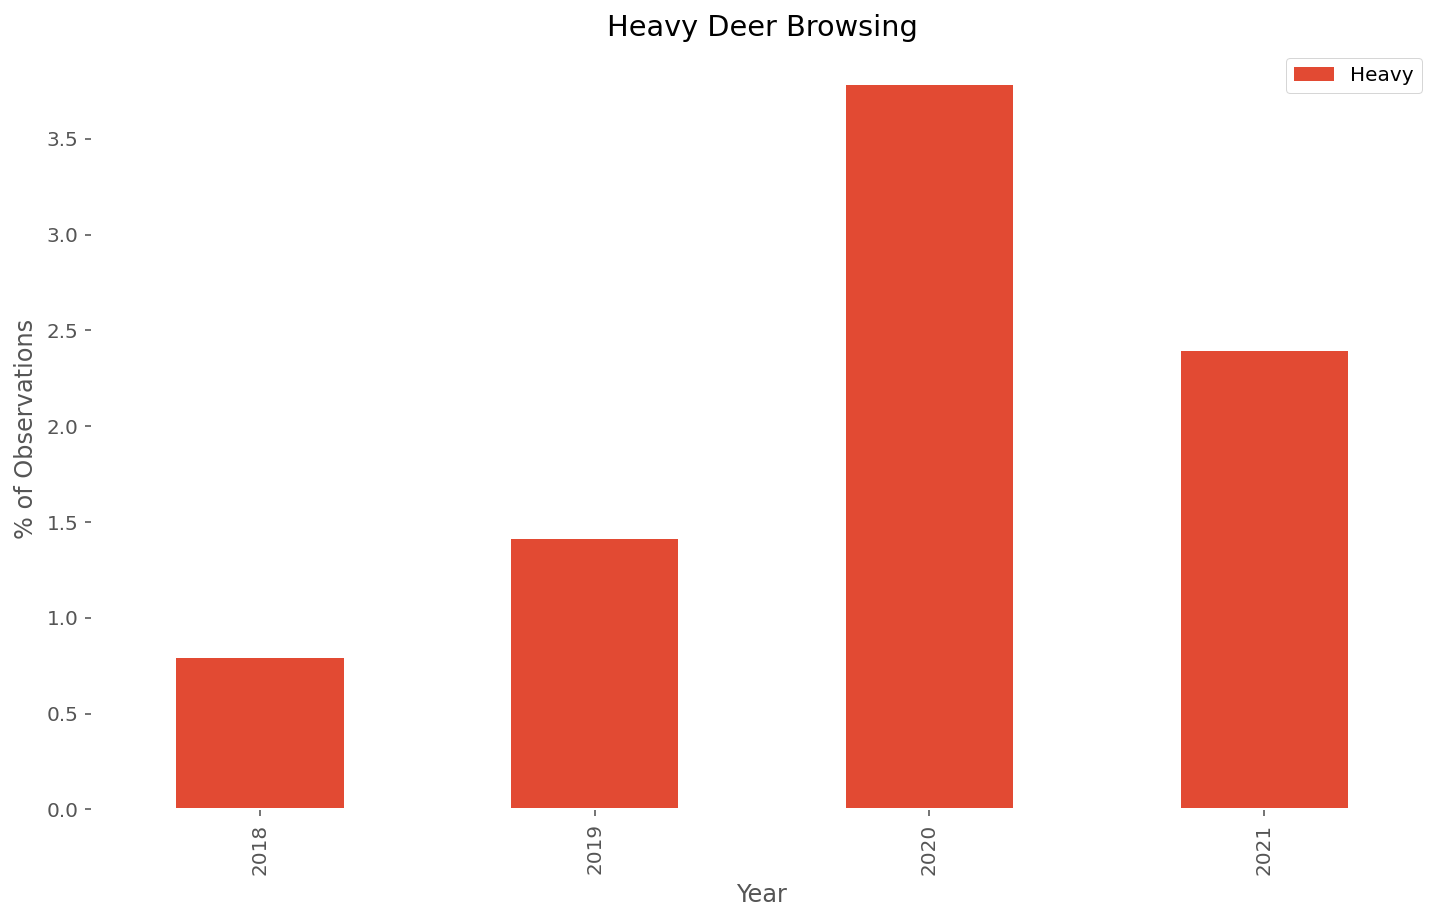

In [33]:
# Count of observations per year
obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by grazing impact levels
impact_pct = data.groupby(['Year','DeerBrow']).size() / obs_count_by_year *100

#Turn into dataframe
impact_pct_df = impact_pct.unstack()

#Reorder columns
impact_pct_df = impact_pct_df[['Heavy']]
#Bar plot
axes = impact_pct_df.plot.bar()
plt.ylabel('% of Observations')
plt.xlabel('Year')
plt.title('Heavy Deer Browsing')
axes.legend(title='')

KeyError: 'Yes'

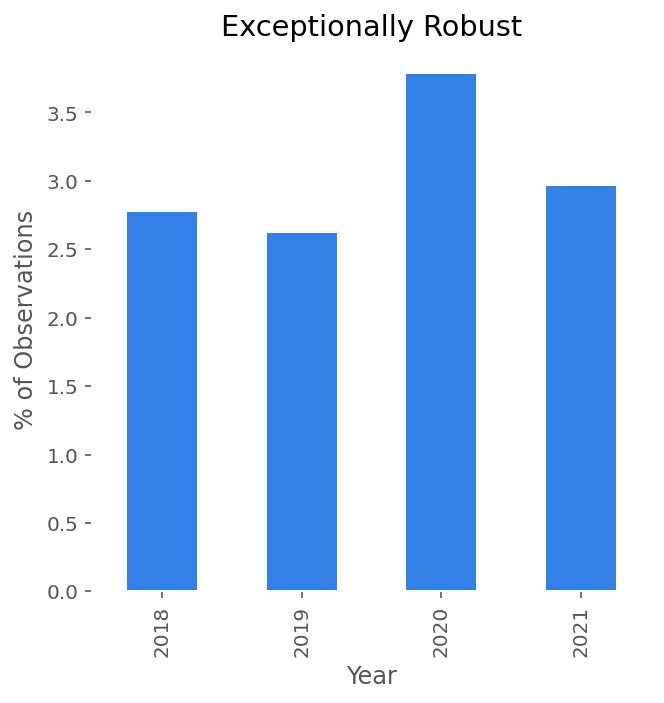

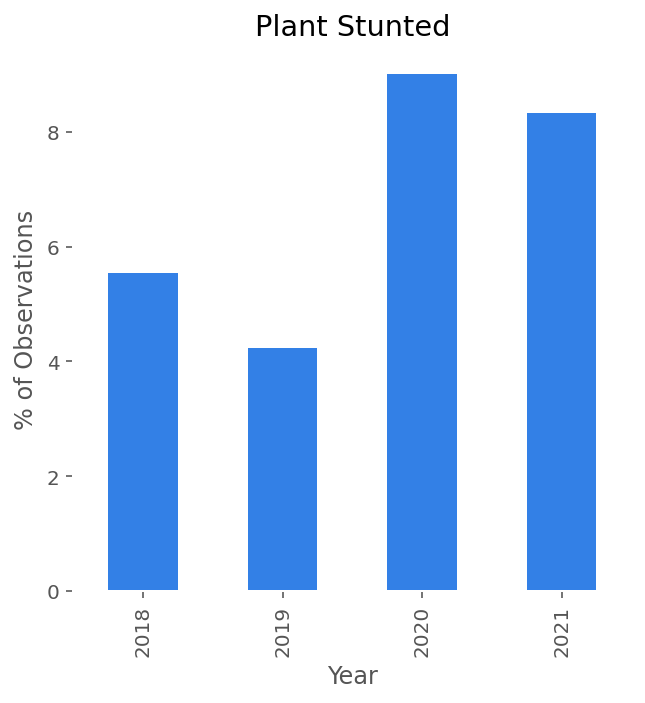

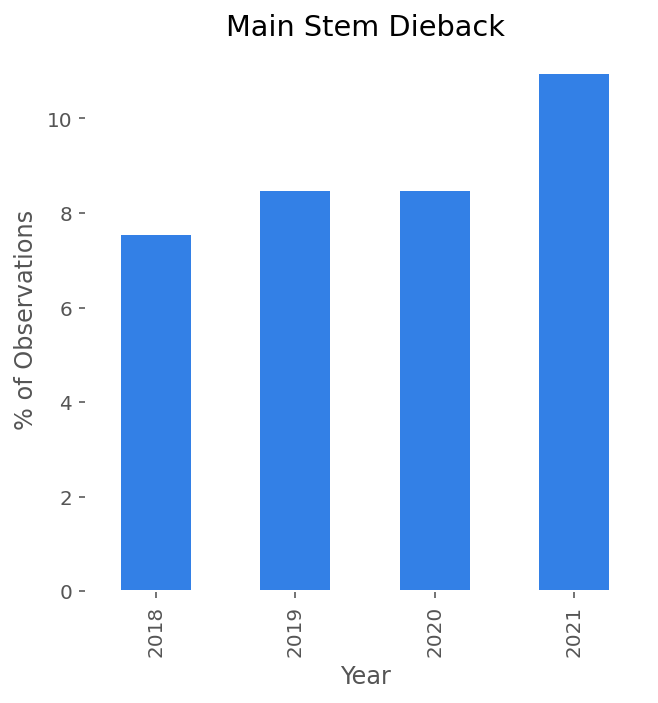

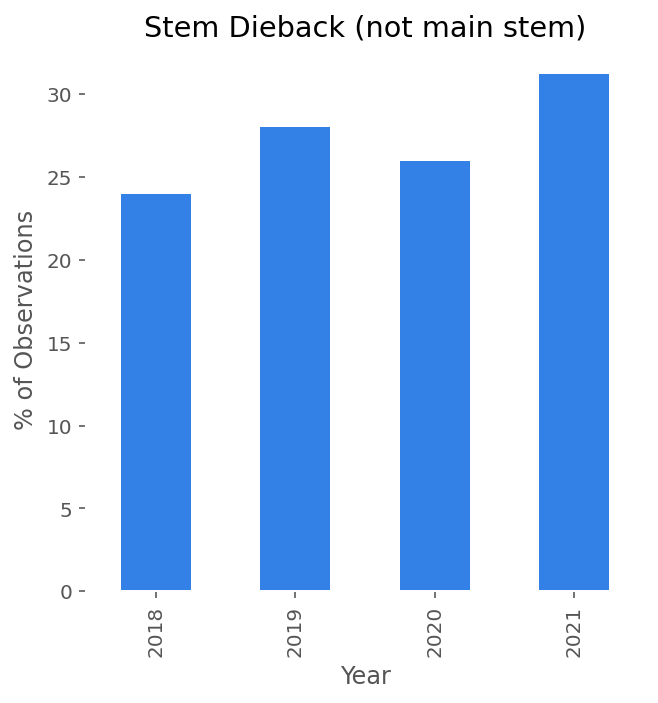

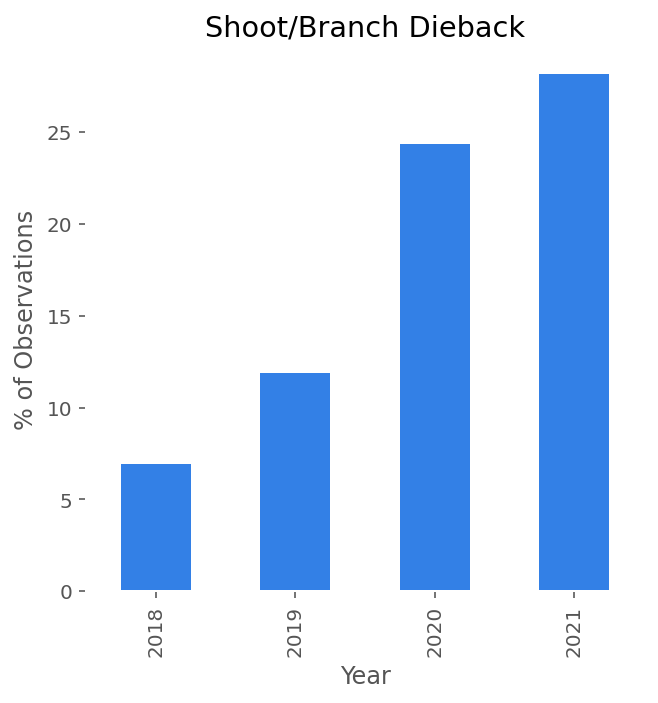

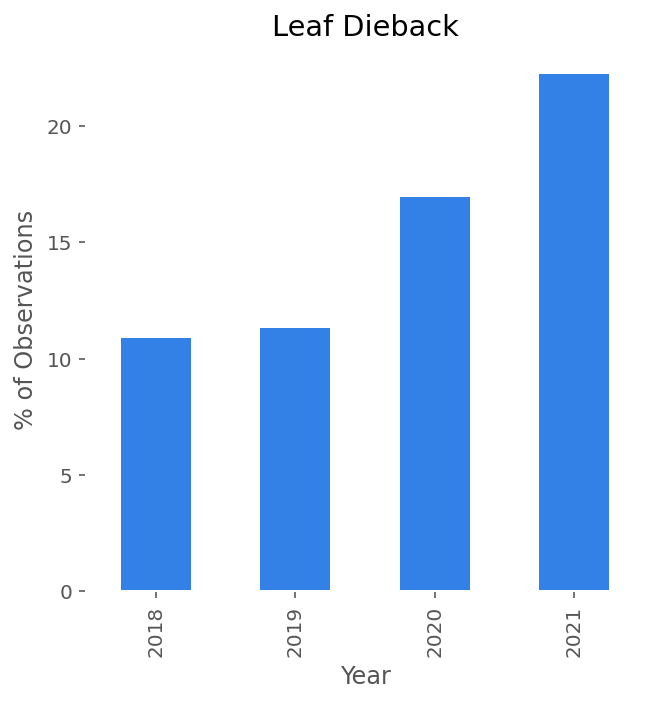

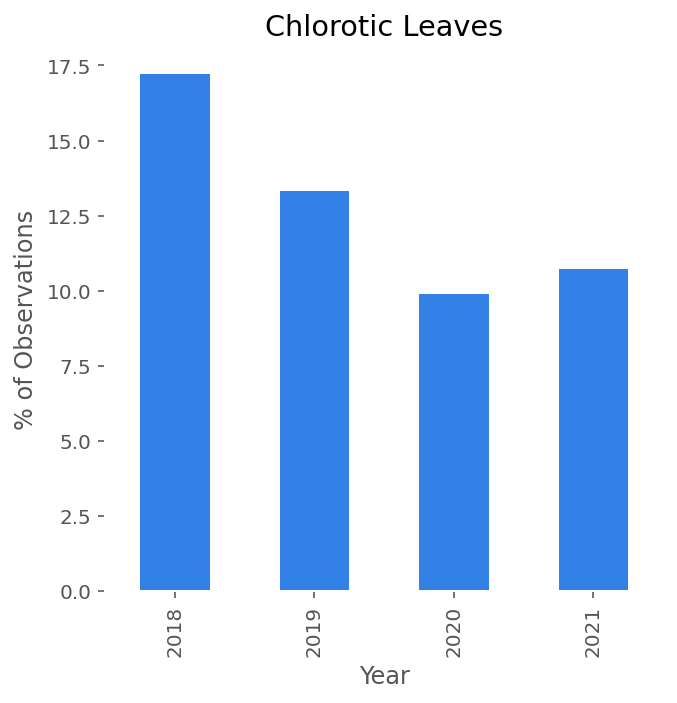

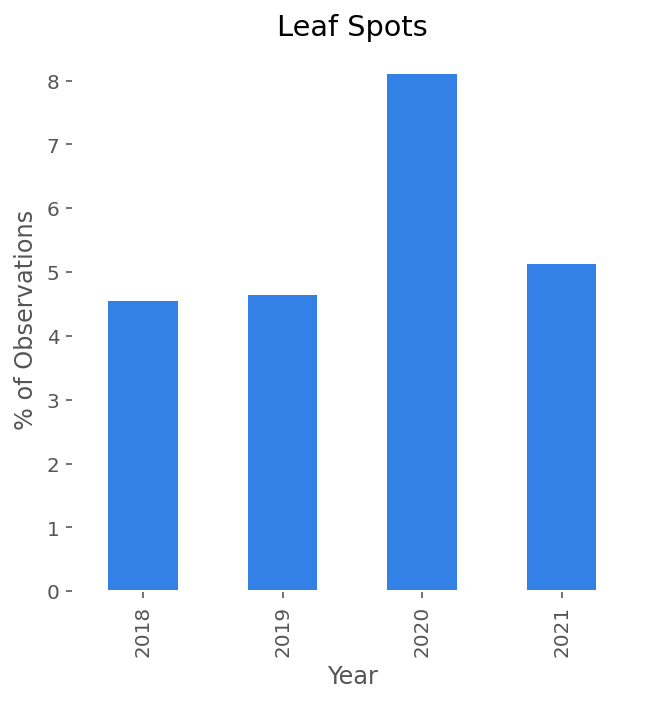

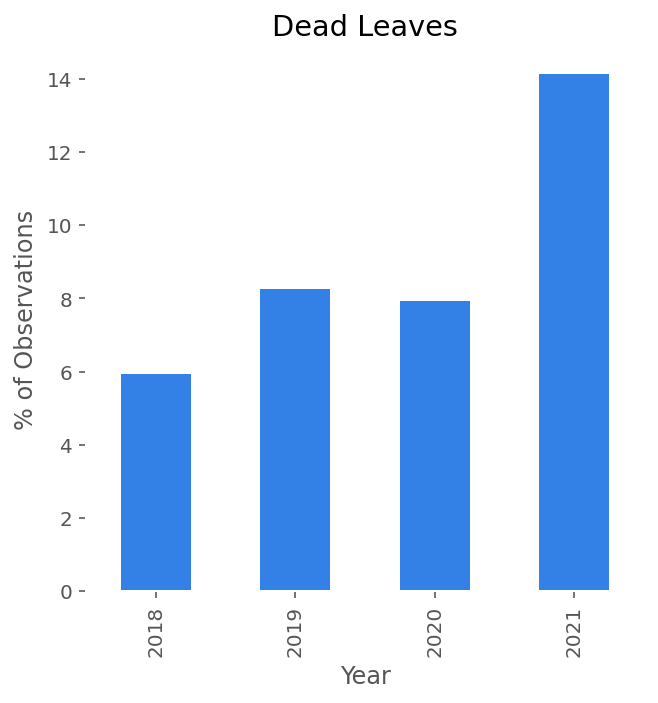

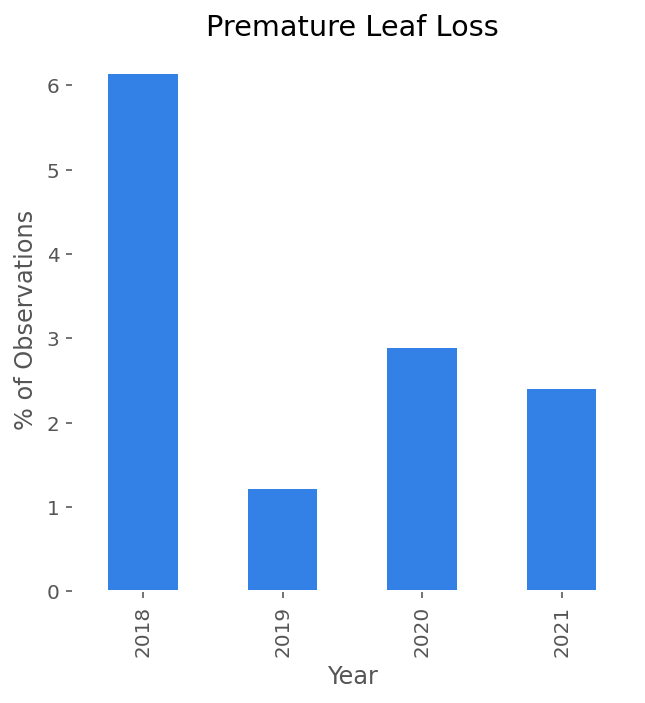

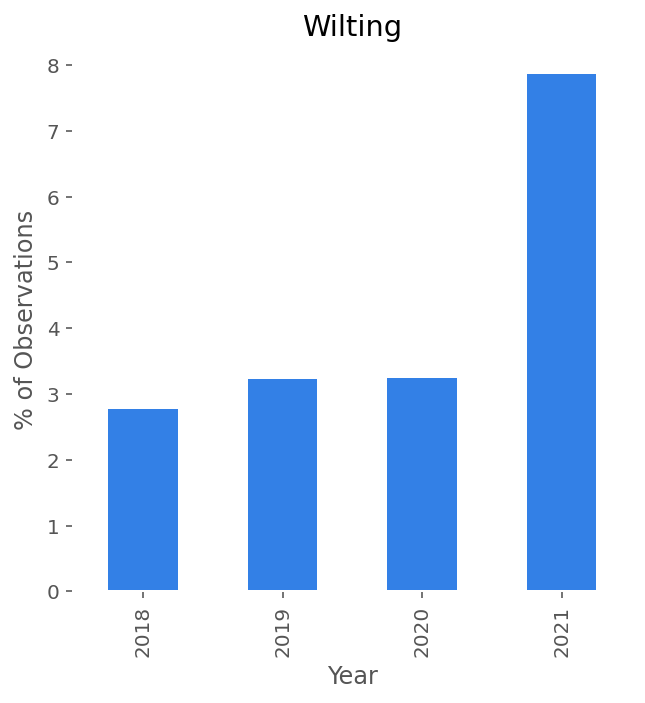

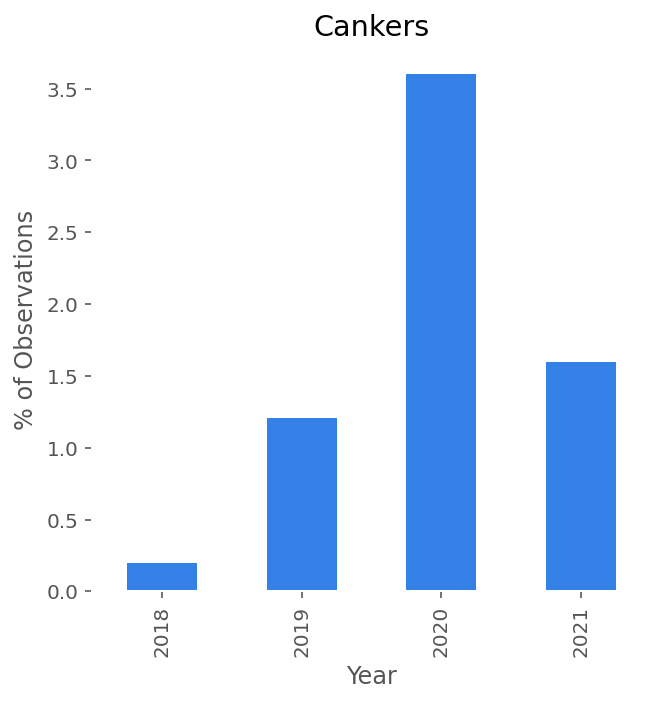

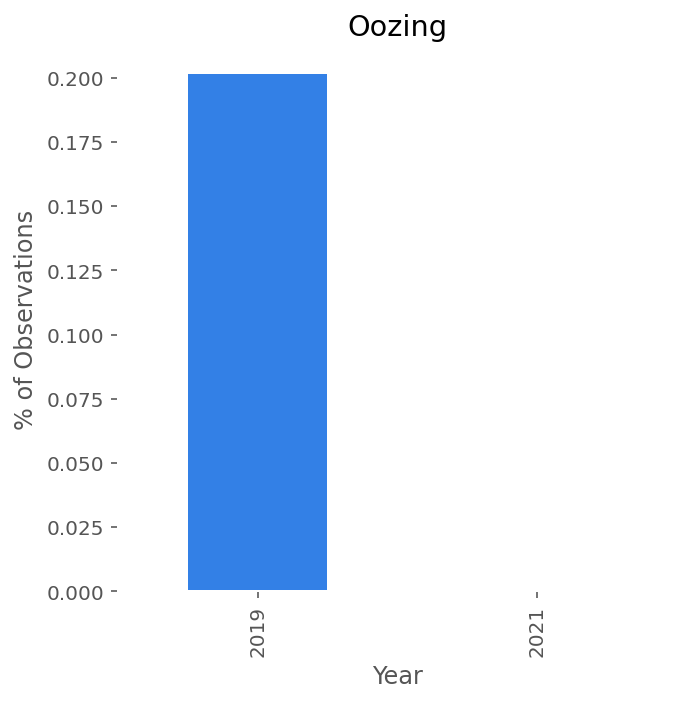

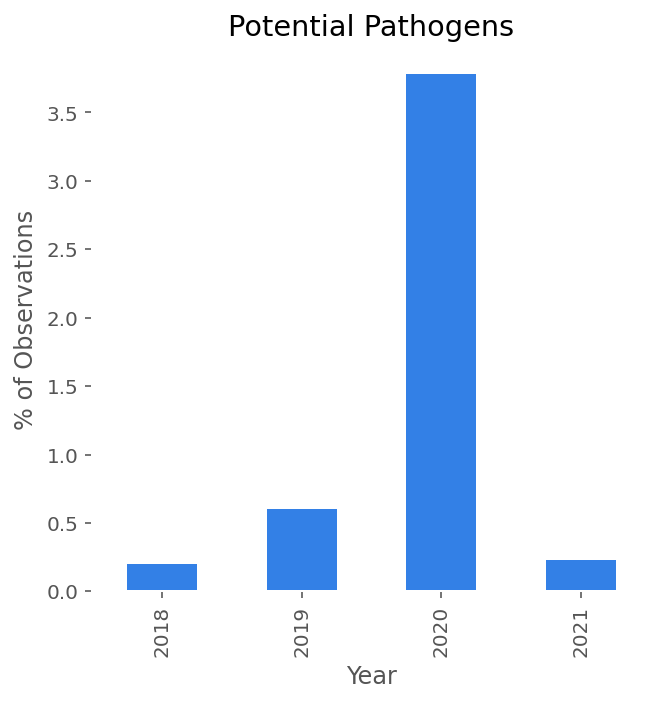

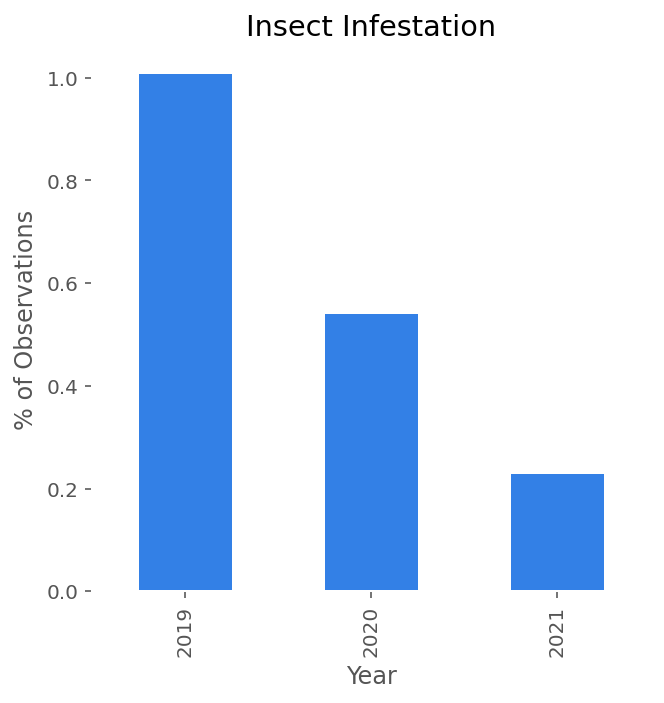

<Figure size 864x504 with 0 Axes>

In [34]:
#Plots for variabels with Yes/No domain
title_dictionary= {'ExcptRob':'Exceptionally Robust','PlantStunt':'Plant Stunted','MainStmDeR':'Main Stem Dieback','StemDiebac':'Stem Dieback (not main stem)','ShootBranc':'Shoot/Branch Dieback','LeafDiebac':'Leaf Dieback','LeavesChlo':'Chlorotic Leaves','LeafSpots':'Leaf Spots','DeadLeaves':'Dead Leaves','PrematureL':'Premature Leaf Loss','Wilting':'Wilting','Cankers':'Cankers','Oozing':'Oozing','PotentialP':'Potential Pathogens','InsectInfe':'Insect Infestation','DeadPathog':'Dead Due to Pathogens'}

vars_to_plot = ['ExcptRob','PlantStunt','MainStmDeR','StemDiebac','ShootBranc','LeafDiebac','LeavesChlo','LeafSpots','DeadLeaves','PrematureL','Wilting','Cankers','Oozing','PotentialP','InsectInfe', 'DeadPathog', 'DeerBrow', 'RodentBrow', 'InsectBrow']
    
for var in vars_to_plot:
    # Count of observations per year
    obs_count_by_year = data.groupby('Year').size()

    # Percent of obsevations by variable
    pct = data.groupby(['Year',var]).size() / obs_count_by_year *100

    #Turn into dataframe
    pct_df = pct.unstack()


    #Bar plot
    fig = plt.figure()
    axes = pct_df['Yes'].plot.bar(figsize=(5,5), color=(.2,.5,.9))
    axes.set_ylabel('% of Observations')
    axes.set_xlabel('Year')
    axes.set_title(title_dictionary[var])

## Models
### Applied to any field that has binary response (yes/no, alive/dead)

In [35]:
model_data = data.groupby('Year').AliveDead.value_counts().unstack().reset_index()

binom_model_results = glm_binomial(model_data,'Alive + Dead ~ Year')
print(binom_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['Alive', 'Dead']   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.174
Date:                Mon, 13 Sep 2021   Deviance:                       7.9271
Time:                        17:11:11   Pearson chi2:                     7.85
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    326.6710     79.855      4.091      0.0

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

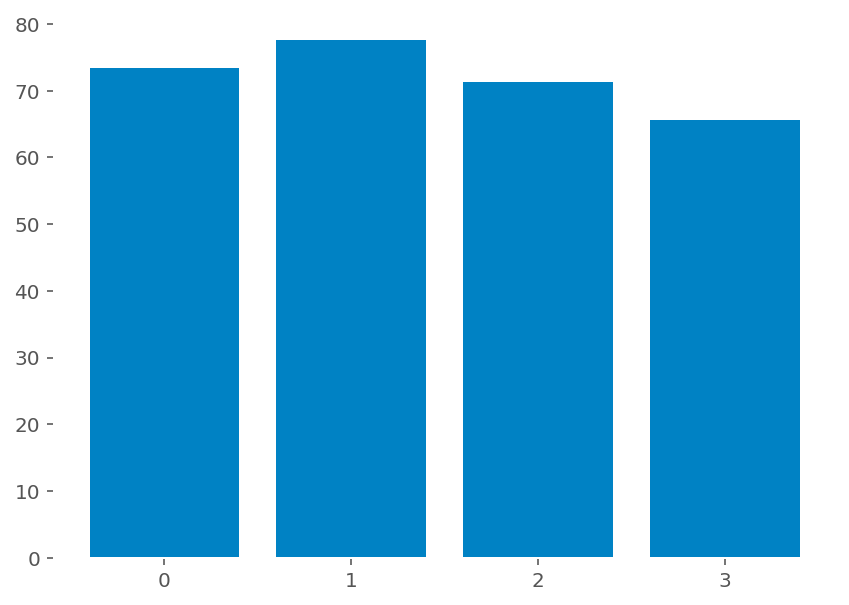

In [36]:
model_data.columns = ['Year','Success','Fail']
glm_binomial_plot(binom_model_results, model_data, 2020, y_label='% Alive', fig_size = (7,5))

In [37]:
data.head()

,OBJECTID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,AliveDead,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,Depredated,DeadPathog,Comments,Species,GlobalID,Volunteers,Missing,SHAPE,month,Year
0,1,SAC,2018-04-03 00:25:59,Marina Olson,Roger Stephens,Alive,4 - Poor health; appears heavily afflicted or stressed,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,Light,None,None,None,None,RUUR,4da83822-6a93-4aa9-8ff1-273d1ad65acf,Yes,None,"{""x"": 6184128.309989557, ""y"": 2036143.8574911505, ""spatialReferenc...",4,2018
1,2,SAC,2018-04-03 00:35:52,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,None,None,"Light stem damage, looks like a result of deer rubbing on stem and...",SYAL,6c32d178-7968-423a-81d2-f40088e2cb46,None,None,"{""x"": 6184062.451525465, ""y"": 2036293.595380649, ""spatialReference...",4,2018
2,3,SAC,2018-04-03 00:46:02,Marina Olson,Roger Stephens,Alive,3 - Moderate health; moderate signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,None,None,None,None,"Somewhat small, not too many leaves present. Browse at top of stem.",SYAL,00e9f932-4a5b-46fc-bfb5-87951ebfa99f,None,None,"{""x"": 6183921.109944642, ""y"": 2036395.4537727237, ""spatialReferenc...",4,2018
3,4,SAC,2018-04-03 00:55:29,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Light insect browse on lower portions of leaves.,ARDO,f78ac082-553e-410f-9cd1-1b6df14d4821,None,None,"{""x"": 6183597.127324894, ""y"": 2036518.5332509726, ""spatialReferenc...",4,2018
4,5,SAC,2018-04-03 01:00:50,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Some insect browse on lower leaves.,ARDO,2cbe574b-fabb-4e4d-b742-286df6eae8bd,None,None,"{""x"": 6183603.6991621405, ""y"": 2036550.8245249838, ""spatialReferen...",4,2018


In [38]:
#Model and plot for any variables with yes/no response

variables = ['ExcptRob','PlantStunt','EnteringDo','Dormant','MainStmDeR','StemDiebac','ShootBranc', 'LeafDiebac','LeavesChlo','LeafSpots','DeadLeaves','PrematureL','Wilting','Cankers','Oozing','Depredated']

y_label_dictionary= {'StemDiebac':'% Stem Dieback','LeavesChlo':'% Leaves Chlorotic'}

results = pd.DataFrame(columns=['Variable','pValue'])


for i, var in enumerate(variables):
    # Loop through all binomials, build model, create plot
    model_data = data.groupby('Year')[var].value_counts().unstack()

    #Create no column
    model_data['No'] = obs_count - model_data.Yes
    model_data.reset_index(inplace=True)

    #Build model
    binom_model_results = glm_binomial(model_data,'Yes + No ~ Year')
    #print(binom_model_results.summary())

    results.loc[i] = (var,  binom_model_results.pvalues.Year)
    #Rename columns for plotting function
    model_data.columns = ['Year','Success','Fail']

    #Plot
    glm_binomial_plot(binom_model_results, model_data, 2020, y_label=var, fig_size = (7,5), y_max=30)

results['pValue'] = results.pValue.round(3) 
display(results)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [39]:
print(results)

   Variable  pValue
0  ExcptRob  0.6722


# Plots

In [40]:
data.head()

,OBJECTID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,AliveDead,HealthRank,ExcptRob,PlantStunt,EnteringDo,Dormant,MainStmDeR,StemDiebac,ShootBranc,LeafDiebac,LeavesChlo,LeafSpots,DeadLeaves,PrematureL,Wilting,Cankers,Oozing,PotentialP,InsectInfe,DeerBrow,RodentBrow,InsectBrow,Depredated,DeadPathog,Comments,Species,GlobalID,Volunteers,Missing,SHAPE,month,Year
0,1,SAC,2018-04-03 00:25:59,Marina Olson,Roger Stephens,Alive,4 - Poor health; appears heavily afflicted or stressed,None,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,Light,None,None,None,None,RUUR,4da83822-6a93-4aa9-8ff1-273d1ad65acf,Yes,None,"{""x"": 6184128.309989557, ""y"": 2036143.8574911505, ""spatialReferenc...",4,2018
1,2,SAC,2018-04-03 00:35:52,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,None,None,"Light stem damage, looks like a result of deer rubbing on stem and...",SYAL,6c32d178-7968-423a-81d2-f40088e2cb46,None,None,"{""x"": 6184062.451525465, ""y"": 2036293.595380649, ""spatialReference...",4,2018
2,3,SAC,2018-04-03 00:46:02,Marina Olson,Roger Stephens,Alive,3 - Moderate health; moderate signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Moderate,None,None,None,None,"Somewhat small, not too many leaves present. Browse at top of stem.",SYAL,00e9f932-4a5b-46fc-bfb5-87951ebfa99f,None,None,"{""x"": 6183921.109944642, ""y"": 2036395.4537727237, ""spatialReferenc...",4,2018
3,4,SAC,2018-04-03 00:55:29,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Light insect browse on lower portions of leaves.,ARDO,f78ac082-553e-410f-9cd1-1b6df14d4821,None,None,"{""x"": 6183597.127324894, ""y"": 2036518.5332509726, ""spatialReferenc...",4,2018
4,5,SAC,2018-04-03 01:00:50,Marina Olson,Roger Stephens,Alive,2 - Plant healthy; minor signs of affliction or stress,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Light,None,None,Some insect browse on lower leaves.,ARDO,2cbe574b-fabb-4e4d-b742-286df6eae8bd,None,None,"{""x"": 6183603.6991621405, ""y"": 2036550.8245249838, ""spatialReferen...",4,2018


<Figure size 864x504 with 0 Axes>

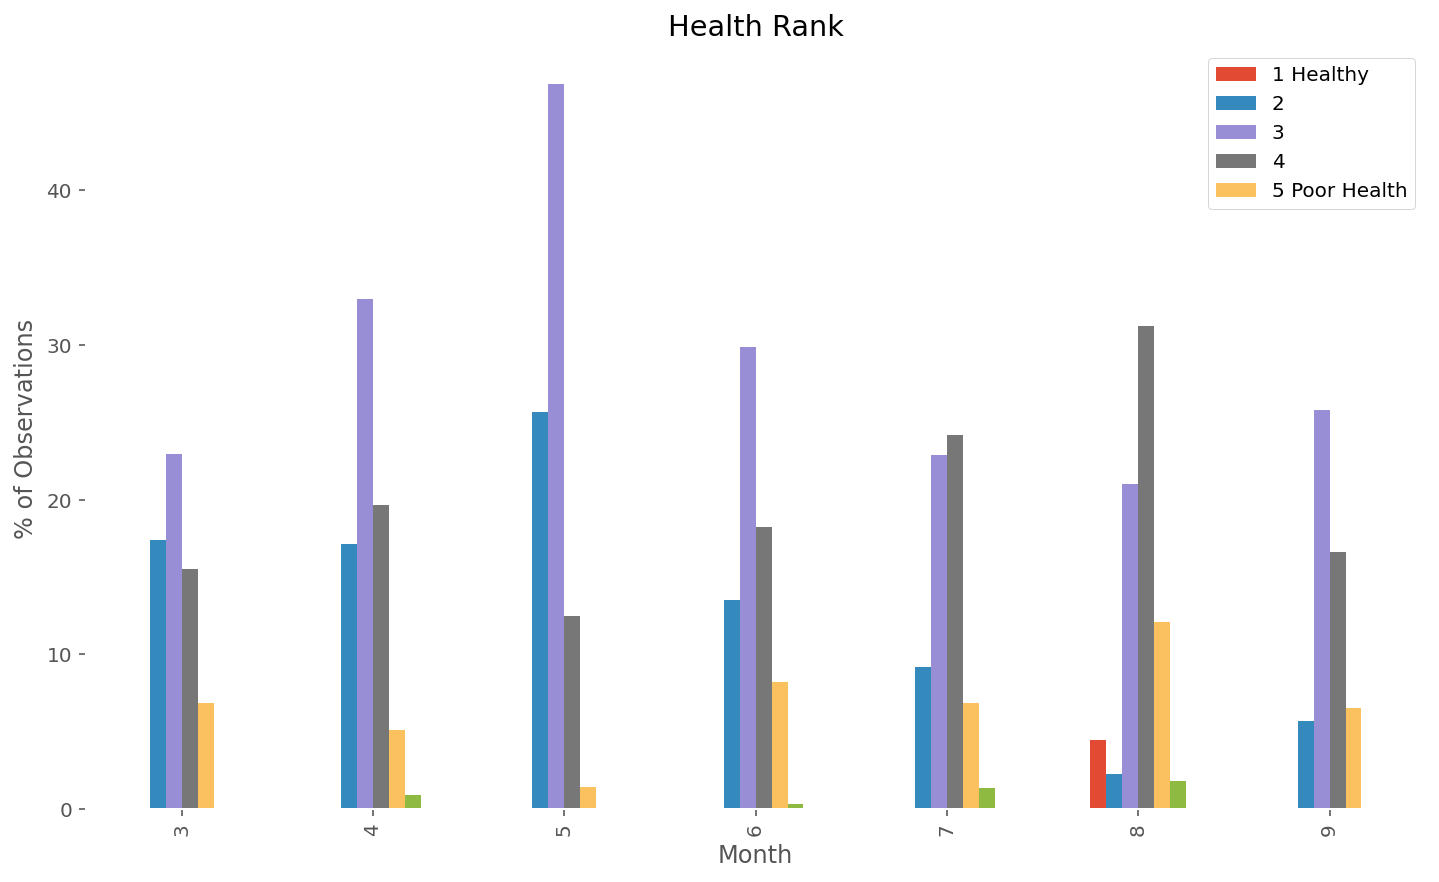

In [41]:
# Count of observations per year
obs_count_by_year = data.groupby('month').size()

# Percent of obsevations by variable
pct = data.groupby(['month','HealthRank']).size() / obs_count_by_year *100

#Turn into dataframe
pct_df = pct.unstack()

#Bar plot
fig = plt.figure()
axes = pct_df.plot.bar()
axes.set_ylabel('% of Observations')
axes.set_xlabel('Month')
axes.set_title('Health Rank')
axes.legend(['1 Healthy','2','3','4','5 Poor Health'])

Year
2018    100.0
2019    100.0
2020    100.0
2021    100.0
dtype: float64


Text(0.5, 1.0, 'Survival')

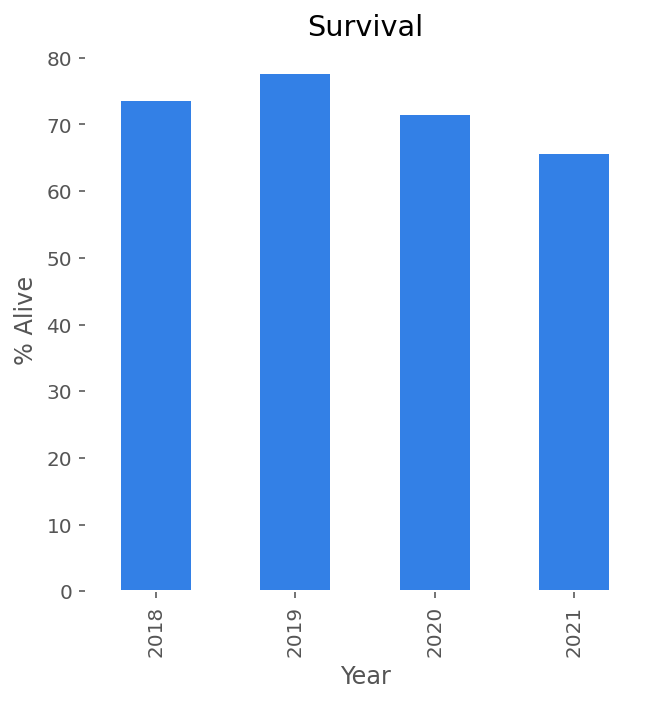

In [42]:

obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by variable
pct = data.groupby(['Year','AliveDead']).size() / obs_count_by_year *100

#Turn into dataframe
pct_df = pct.unstack()

#Check add to 100
print(pct_df.Alive + pct_df.Dead)

#Bar plot
fig = plt.figure()
axes = pct_df['Alive'].plot.bar(figsize=(5,5), color=(.2,.5,.9))
axes.set_ylabel('% Alive')
axes.set_xlabel('Year')
axes.set_title('Survival')

month
3    1.242236
4    2.761628
5    5.208333
6    1.886792
7    4.000000
8    2.232143
9    2.620087
Name: Yes, dtype: float64
month
3     9.937888
4     6.831395
5     4.861111
6    14.465409
7     4.571429
8     6.696429
9     4.366812
Name: Yes, dtype: float64
month
5     1.736111
6     3.773585
7    17.523810
8     5.357143
9     8.296943
Name: Yes, dtype: float64
month
3    0.621118
7    1.904762
8    6.250000
9    3.930131
Name: Yes, dtype: float64
month
3    13.664596
4    10.319767
5     9.027778
6    10.377358
7     7.619048
8     8.928571
9     4.803493
Name: Yes, dtype: float64


month
3     9.316770
4    18.750000
5     6.944444
6    22.641509
7    30.095238
8    21.875000
9    14.410480
Name: Yes, dtype: float64
month
3     5.590062
4    13.372093
5    10.763889
6    21.383648
7    21.904762
8    22.767857
9    14.847162
Name: Yes, dtype: float64
month
3    10.559006
4    16.133721
5    17.708333
6     9.433962
7     9.714286
8    14.732143
9     3.930131
Name: Yes, dtype: float64
month
3    10.559006
4    16.133721
5    17.708333
6     9.433962
7     9.714286
8    14.732143
9     3.930131
Name: Yes, dtype: float64
month
3    0.621118
4    5.232558
5    7.291667
6    7.232704
7    6.476190
8    4.017857
9    5.240175
Name: Yes, dtype: float64


month
3     3.105590
4     5.232558
5     6.944444
6    12.893082
7    14.857143
8    19.642857
9     6.550218
Name: Yes, dtype: float64
month
3    0.621118
4    3.052326
5    2.777778
6    3.459119
7    1.904762
8    8.482143
9    1.746725
Name: Yes, dtype: float64
month
3    1.863354
4    2.325581
5    6.597222
6    8.490566
7    7.238095
8    5.803571
9    0.436681
Name: Yes, dtype: float64
month
3    3.105590
4    2.180233
5    1.388889
7    2.095238
8    0.892857
9    1.746725
Name: Yes, dtype: float64
month
7    0.190476
8         NaN
Name: Yes, dtype: float64


month
4    1.598837
5    2.083333
6    1.886792
7    0.380952
8    0.892857
Name: Yes, dtype: float64


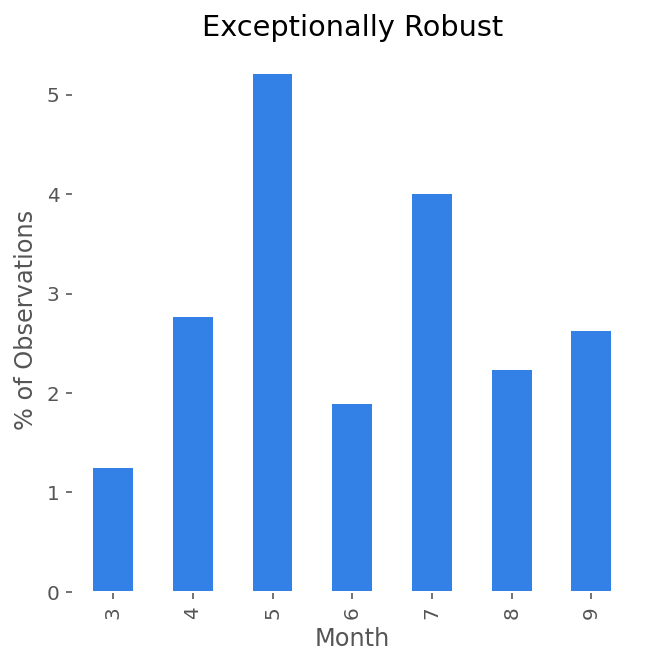

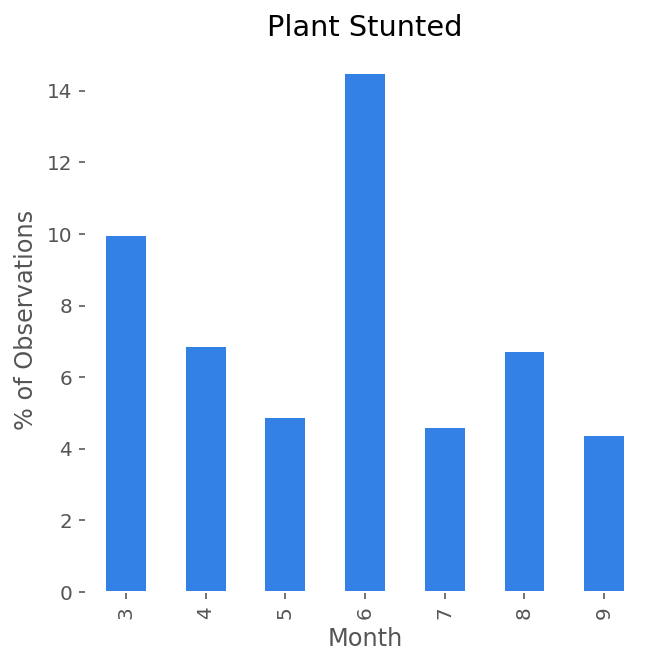

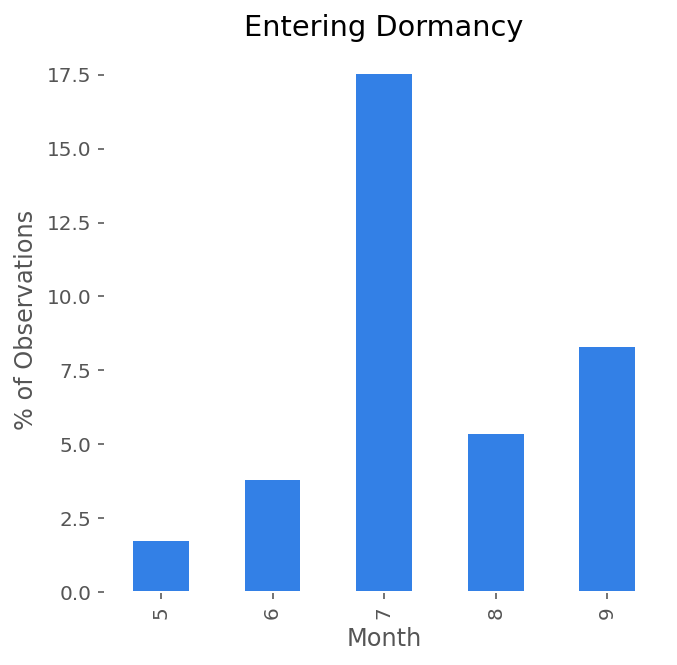

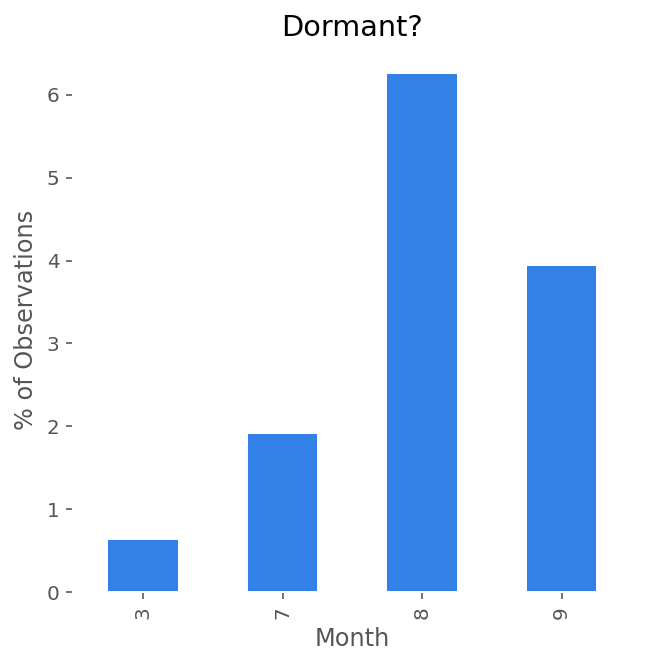

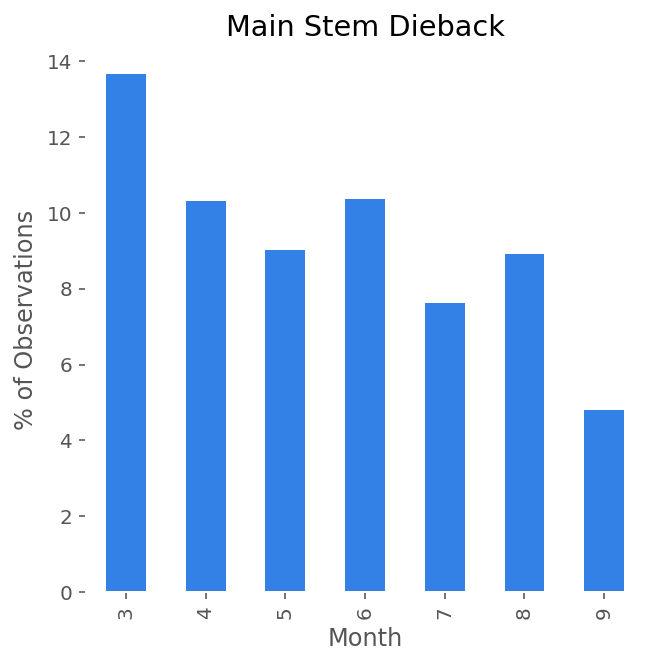

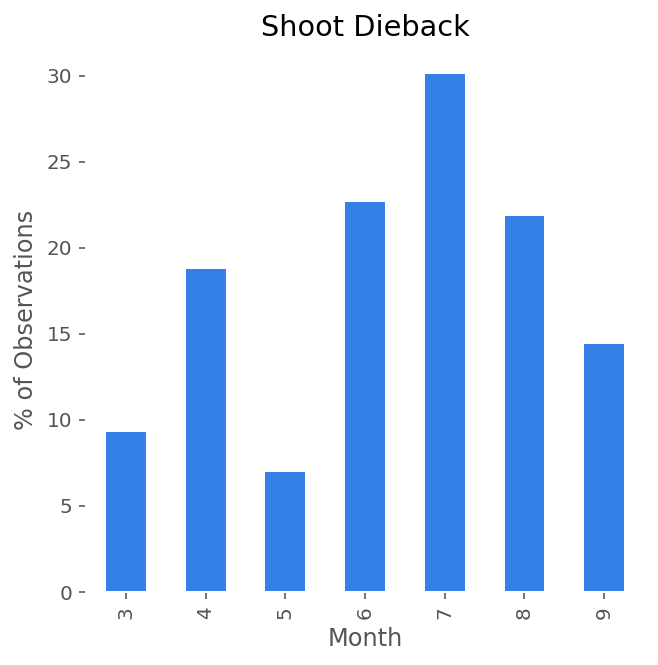

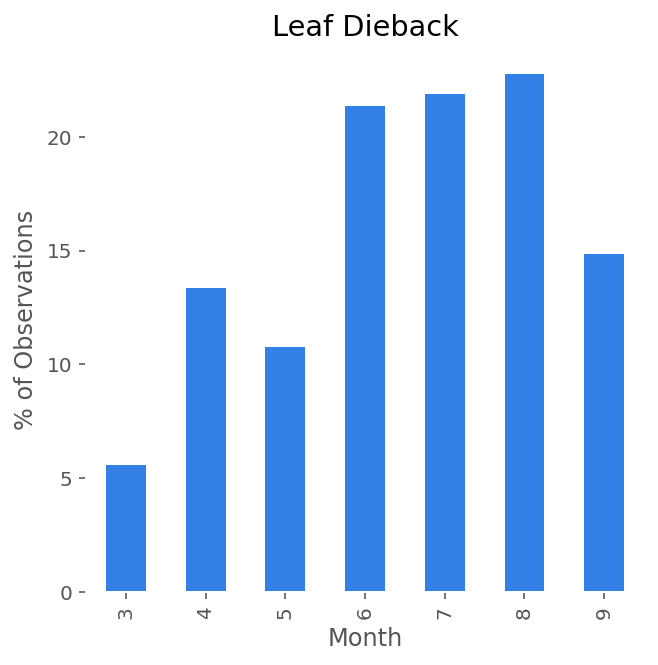

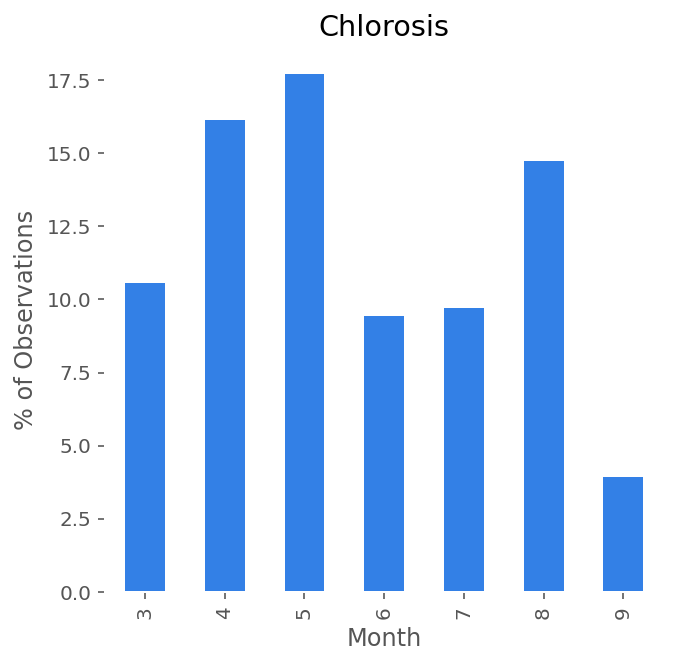

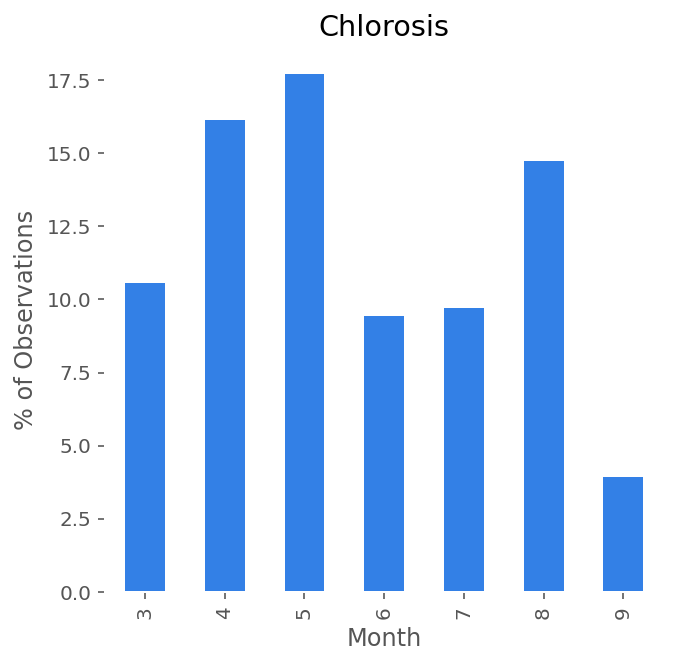

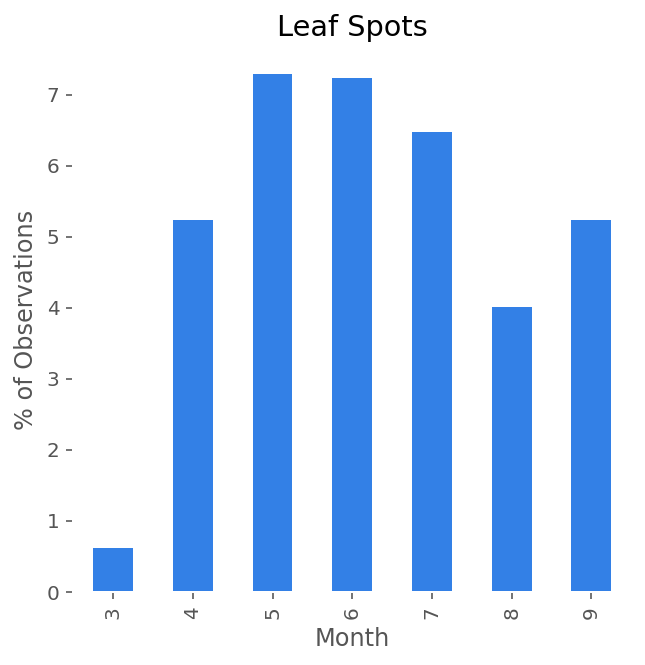

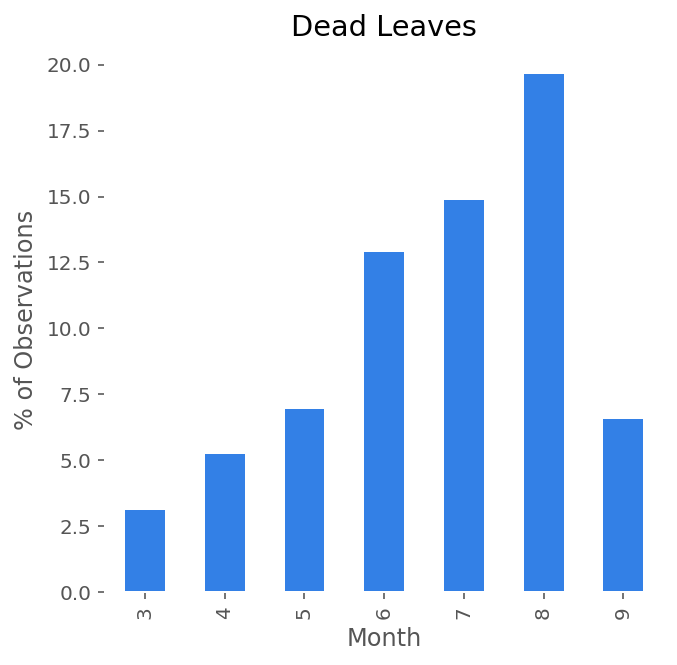

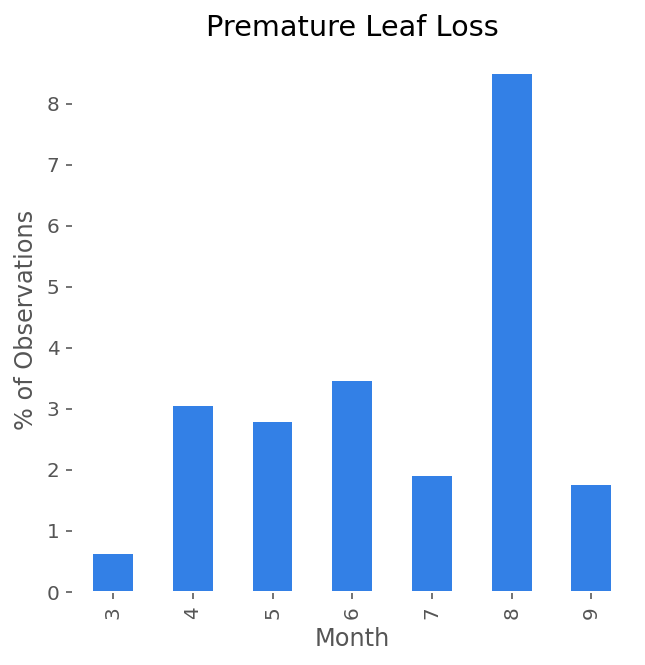

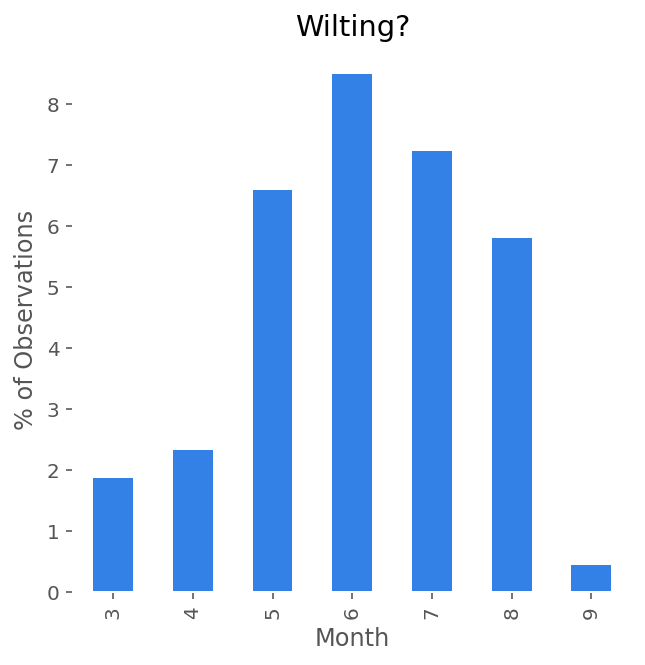

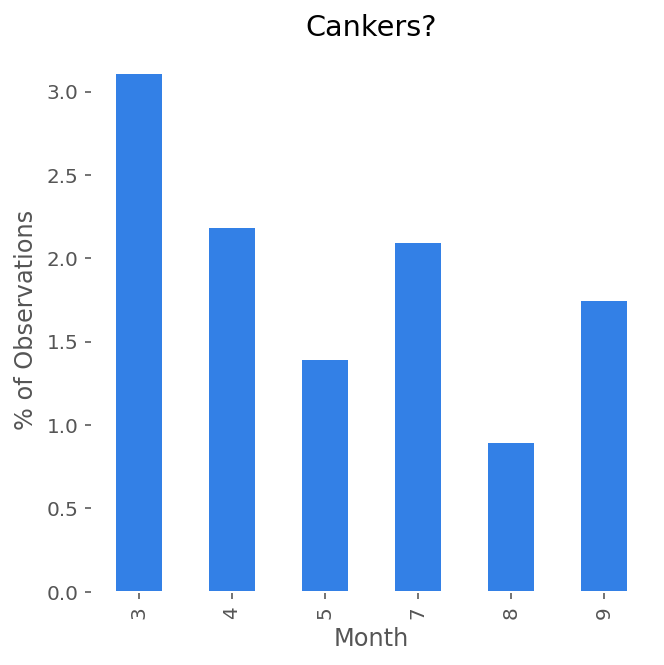

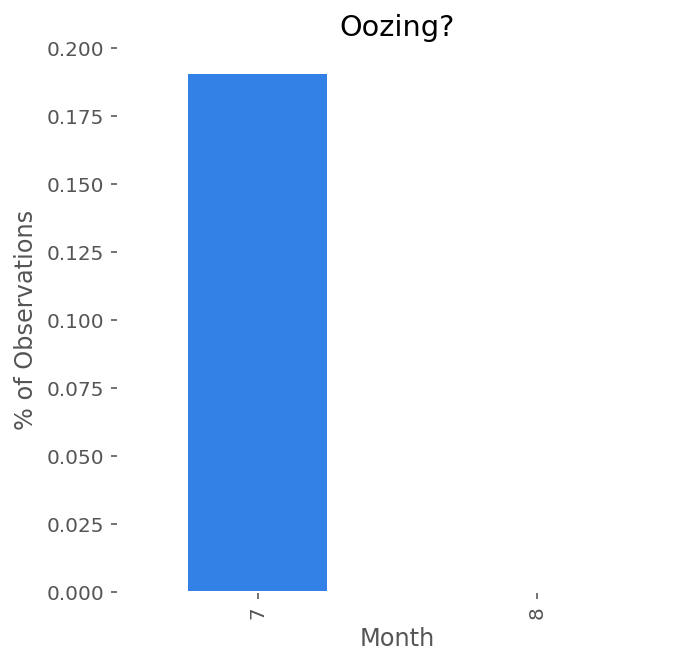

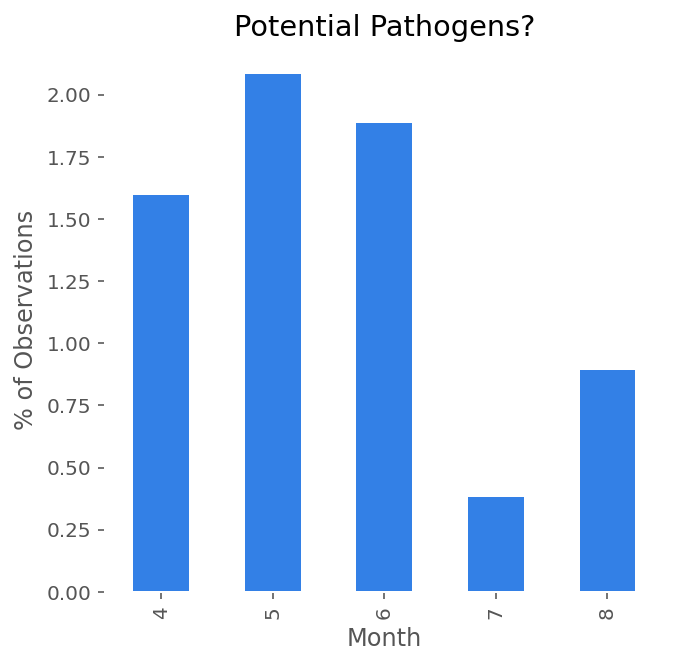

In [44]:
#Plots for variabels with Yes/No domain
title_dictionary= {'AliveDead':'Alive or Dead?','ExcptRob':'Exceptionally Robust','PlantStunt':'Plant Stunted','EnteringDo':'Entering Dormancy','Dormant':'Dormant?','MainStmDeR':'Main Stem Dieback','ShootBranc':'Shoot Dieback','LeafDiebac':'Leaf Dieback','LeavesChlo':'Chlorosis','LeafSpots':'Leaf Spots','DeadLeaves':'Dead Leaves','PrematureL':'Premature Leaf Loss','Wilting':'Wilting?','Cankers':'Cankers?','Oozing':'Oozing?','PotentialP':'Potential Pathogens?'}


vars_to_plot = ['ExcptRob','PlantStunt','EnteringDo','Dormant','MainStmDeR','ShootBranc','LeafDiebac','LeavesChlo','LeavesChlo','LeafSpots','DeadLeaves','PrematureL','Wilting','Cankers','Oozing','PotentialP']
    
for var in vars_to_plot:
    # Count of observations per year
    obs_count_by_year = data.groupby('month').size()

    # Percent of obsevations by variable
    pct = data.groupby(['month',var]).size() / obs_count_by_year *100

    #Turn into dataframe
    pct_df = pct.unstack()

    #Check add to 100
    print(pct_df.Yes)

    #Bar plot
    fig = plt.figure()
    axes = pct_df['Yes'].plot.bar(figsize=(5,5), color=(.2,.5,.9))
    axes.set_ylabel('% of Observations')
    axes.set_xlabel('Month')
    axes.set_title(title_dictionary[var])

# Export data deliverable

In [4]:
data.columns

Index(['OBJECTID', 'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt', 'EnteringDo',
       'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc', 'LeafDiebac',
       'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL', 'Wilting',
       'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog', 'Comments',
       'Species', 'GlobalID', 'Volunteers', 'Missing', 'SHAPE'],
      dtype='object')

In [5]:
data = data.rename(columns={'OBJECTID':'Object ID','GlobalID':'Record Global ID'})

In [6]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Species',
    'AliveDead',
    'HealthRank',
    'ExcptRob',
    'PlantStunt',
    'EnteringDo',
    'Dormant',
    'MainStmDeR',
    'StemDiebac',
    'ShootBranc',
    'LeafDiebac',
    'LeavesChlo',
    'LeafSpots',
    'DeadLeaves',
    'PrematureL',
    'Wilting',
    'Cankers',
    'Oozing',
    'PotentialP',
    'InsectInfe',
    'DeerBrow',
    'RodentBrow',
    'InsectBrow',
    'Depredated',
    'DeadPathog',
    'Volunteers',
    'Missing',
    'Comments',
    'Record Global ID',
    'Object ID',
    'SHAPE'
]

In [7]:
export_data_deliverable(data, feature_service, field_order, file_name='Monthly_Plant_Health_Inspection')

No Related Table Found


Exported to Outputs/Monthly_Plant_Health_Inspection_Data_20211216.xlsx
